In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
infile = open('real_estate_data_frame','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,localization_y,localization_x,area,sewers,road,fence,water,electricity,gas,price
0,51.835925,19.193010,1004.0,brak,utwardzana,brak,wodociąg w drodze,w drodze,brak,90360.0
1,50.472433,19.233789,18.0,szambo,asfaltowa,żywopłot,wodociąg na działce,na działce,brak,229000.0
2,51.801330,19.189772,1200.0,brak,utwardzana,brak,brak,brak,brak,84000.0
3,53.723500,20.867400,1262.0,brak,utwardzana,brak,własne ujęcie/studnia,brak,brak,88340.0
4,52.094000,20.807400,950.0,brak,utwardzana,brak,brak,brak,brak,295000.0
...,...,...,...,...,...,...,...,...,...,...
7624,49.939618,19.889479,2000.0,brak,polna,brak,brak,brak,brak,360000.0
7625,49.907755,20.200424,35.2,brak,polna,brak,brak,brak,brak,315000.0
7626,50.026720,19.700051,4400.0,szambo,polna,brak,brak,brak,brak,160000.0
7627,49.987773,19.679529,4400.0,brak,polna,brak,brak,brak,brak,440000.0


In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   localization_y  7629 non-null   float64
 1   localization_x  7629 non-null   float64
 2   area            7629 non-null   float64
 3   sewers          7629 non-null   object 
 4   road            7629 non-null   object 
 5   fence           7629 non-null   object 
 6   water           7629 non-null   object 
 7   electricity     7629 non-null   object 
 8   gas             7629 non-null   object 
 9   price           7629 non-null   float64
dtypes: float64(4), object(6)
memory usage: 596.1+ KB


## creating dummy variables

In [5]:
dummies = pd.get_dummies(frame[['sewers','road','fence','water','electricity','gas']],drop_first=True)
frame = frame.drop(['sewers','road','fence','water','electricity','gas'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   localization_y                           7629 non-null   float64
 1   localization_x                           7629 non-null   float64
 2   area                                     7629 non-null   float64
 3   price                                    7629 non-null   float64
 4   sewers_miejska                           7629 non-null   uint8  
 5   sewers_przydomowa oczyszczalnia ścieków  7629 non-null   uint8  
 6   sewers_szambo                            7629 non-null   uint8  
 7   road_kostka brukowa                      7629 non-null   uint8  
 8   road_polna                               7629 non-null   uint8  
 9   road_utwardzana                          7629 non-null   uint8  
 10  fence_brak                               7629 no


#### adjustments for better training

In [7]:
frame = frame.drop(['water_wodociąg na działce','water_wodociąg w drodze','water_własne ujęcie/studnia',
                    'electricity_na działce','electricity_w drodze','gas_na działce','gas_w drodze',
                    'sewers_miejska','sewers_przydomowa oczyszczalnia ścieków','sewers_szambo'],axis=1)

In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   localization_y       7629 non-null   float64
 1   localization_x       7629 non-null   float64
 2   area                 7629 non-null   float64
 3   price                7629 non-null   float64
 4   road_kostka brukowa  7629 non-null   uint8  
 5   road_polna           7629 non-null   uint8  
 6   road_utwardzana      7629 non-null   uint8  
 7   fence_brak           7629 non-null   uint8  
 8   fence_drewniane      7629 non-null   uint8  
 9   fence_inne           7629 non-null   uint8  
 10  fence_metalowe       7629 non-null   uint8  
 11  fence_mieszane       7629 non-null   uint8  
 12  fence_murowane       7629 non-null   uint8  
 13  fence_siatka         7629 non-null   uint8  
 14  fence_żywopłot       7629 non-null   uint8  
dtypes: float64(4), uint8(11)
memory usage:

## train test split

In [9]:
X = frame.drop('price',axis=1).values
y = frame['price'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train= scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(5721, 14)

In [17]:
X_test.shape

(1908, 14)

## creating model 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

model.add(Dense(8,activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 120       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [21]:
# from tensorflow.keras.callbacks import EarlyStopping

In [22]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=20000,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 5721 samples, validate on 1908 samples
Epoch 1/20000
5721/5721 [==============================] - 0s 87us/sample - loss: 2655444054185.6821 - val_loss: 4514962737851.8408
Epoch 2/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2655443736804.0327 - val_loss: 4514962482852.2266
Epoch 3/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2655443276963.7754 - val_loss: 4514961690924.5449
Epoch 4/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2655442537799.3721 - val_loss: 4514960432963.0859
Epoch 5/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2655441224899.9937 - val_loss: 4514958147309.2158
Epoch 6/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2655438486615.5259 - val_loss: 4514954630073.1572
Epoch 7/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2655434067970.1479 - val_loss: 4514948475459.6230
Epoch 8/20000
5721/5721 [=========

Epoch 63/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2393544810904.0962 - val_loss: 4203875553408.8057
Epoch 64/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2387242484576.8779 - val_loss: 4195585083988.7969
Epoch 65/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2381514929669.4590 - val_loss: 4188439635929.3579
Epoch 66/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2376742355130.1494 - val_loss: 4181455165169.5093
Epoch 67/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372313767370.3926 - val_loss: 4175567723084.2095
Epoch 68/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2368253313943.2910 - val_loss: 4171053472606.9937
Epoch 69/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2365137772173.1333 - val_loss: 4166034547117.3506
Epoch 70/20000
5721/5721 [==============================] - 0s 6us/sample - 

Epoch 125/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2337629344768.5371 - val_loss: 4122485115614.1880
Epoch 126/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2337400871678.4336 - val_loss: 4122104515500.2769
Epoch 127/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2337169251256.5830 - val_loss: 4121878636402.3145
Epoch 128/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2336952325034.6221 - val_loss: 4121541390069.8027
Epoch 129/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2336761540837.8228 - val_loss: 4121270036956.5786
Epoch 130/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2336545913376.4868 - val_loss: 4121026319426.5493
Epoch 131/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2336354478115.4399 - val_loss: 4120676269805.2158
Epoch 132/20000
5721/5721 [==============================] - 0s 6us/s

5721/5721 [==============================] - 0s 7us/sample - loss: 2325805771079.5513 - val_loss: 4107274044594.1807
Epoch 187/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2325638891777.3872 - val_loss: 4106963647412.8638
Epoch 188/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2325488737237.2212 - val_loss: 4107077569589.6694
Epoch 189/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2325281225700.9727 - val_loss: 4106786635363.8237
Epoch 190/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2325106191978.0513 - val_loss: 4106577561509.8364
Epoch 191/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2324918213927.1538 - val_loss: 4106170063882.7339
Epoch 192/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2324725275496.3960 - val_loss: 4105952579987.5894
Epoch 193/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 23

Epoch 248/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2315005042967.2236 - val_loss: 4093386103921.7783
Epoch 249/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2314795680855.1680 - val_loss: 4093156812005.7021
Epoch 250/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2314614583099.1113 - val_loss: 4093089526180.7632
Epoch 251/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2314434519611.3350 - val_loss: 4093073744782.2217
Epoch 252/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2314269527696.7134 - val_loss: 4092972565991.3125
Epoch 253/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2314118991607.8115 - val_loss: 4092571828601.8281
Epoch 254/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2313932638519.7998 - val_loss: 4092160204817.1743
Epoch 255/20000
5721/5721 [==============================] - 0s 5us/s

5721/5721 [==============================] - 0s 7us/sample - loss: 2304921027043.9878 - val_loss: 4081108163766.4731
Epoch 310/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2304788163268.4414 - val_loss: 4080854098967.6143
Epoch 311/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2304631938388.9751 - val_loss: 4080973783915.8745
Epoch 312/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2304464285845.6353 - val_loss: 4080714151442.2480
Epoch 313/20000
5721/5721 [==============================] - 0s 3us/sample - loss: 2304425991778.1758 - val_loss: 4080315585396.4614
Epoch 314/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2304143414968.4487 - val_loss: 4080064603674.8345
Epoch 315/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2303986322106.4180 - val_loss: 4079755098442.5996
Epoch 316/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 23

Epoch 371/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2296025756195.7085 - val_loss: 4069696790339.0854
Epoch 372/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2295935542443.6509 - val_loss: 4069602803746.3481
Epoch 373/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2295793959556.3628 - val_loss: 4069575117053.3169
Epoch 374/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2295690426388.4048 - val_loss: 4069307236661.1318
Epoch 375/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2295555312726.8101 - val_loss: 4069114812523.3369
Epoch 376/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2295448304043.0693 - val_loss: 4069242222750.8594
Epoch 377/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2295333798251.7070 - val_loss: 4068966381314.6831
Epoch 378/20000
5721/5721 [==============================] - 0s 6us/s

5721/5721 [==============================] - 0s 6us/sample - loss: 2289577435730.2456 - val_loss: 4061766160547.1533
Epoch 433/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2289521065010.2959 - val_loss: 4061531075083.8066
Epoch 434/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2289439356246.7651 - val_loss: 4061534103204.2271
Epoch 435/20000
5721/5721 [==============================] - 0s 3us/sample - loss: 2289382618125.4243 - val_loss: 4061163168894.6582
Epoch 436/20000
5721/5721 [==============================] - 0s 3us/sample - loss: 2289242547595.0303 - val_loss: 4061143079431.5132
Epoch 437/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2289281855425.7114 - val_loss: 4060705015923.9243
Epoch 438/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2289096025468.7114 - val_loss: 4061015070174.7256
Epoch 439/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 22

Epoch 494/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2285461754860.4902 - val_loss: 4055706698140.1763
Epoch 495/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2285381951681.3086 - val_loss: 4055763020080.8384
Epoch 496/20000
5721/5721 [==============================] - 0s 3us/sample - loss: 2285408930370.1367 - val_loss: 4055949308839.9829
Epoch 497/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2285330170465.9971 - val_loss: 4055599013561.6938
Epoch 498/20000
5721/5721 [==============================] - 0s 3us/sample - loss: 2285308961199.0073 - val_loss: 4055466489602.6831
Epoch 499/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2285206795810.0977 - val_loss: 4055728032924.7129
Epoch 500/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2285246846130.0947 - val_loss: 4055461591301.9033
Epoch 501/20000
5721/5721 [==============================] - 0s 5us/s

5721/5721 [==============================] - 0s 5us/sample - loss: 2283156484385.9634 - val_loss: 4052908407664.1670
Epoch 556/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2283214328743.7578 - val_loss: 4052696473857.6094
Epoch 557/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2283122644148.9585 - val_loss: 4052936405412.7632
Epoch 558/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2283168509457.2725 - val_loss: 4052683698596.7632
Epoch 559/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2283054984632.4937 - val_loss: 4052927947009.6094
Epoch 560/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2283013723757.9893 - val_loss: 4052864760413.3843
Epoch 561/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2283022423802.3169 - val_loss: 4052618276357.3667
Epoch 562/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 22

Epoch 617/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2281532440458.5830 - val_loss: 4050674913855.3296
Epoch 618/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2281504099305.9844 - val_loss: 4050806722276.6294
Epoch 619/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2281484878459.7715 - val_loss: 4050620428021.8027
Epoch 620/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2281465439389.3320 - val_loss: 4050411460784.0337
Epoch 621/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2281523587600.0195 - val_loss: 4050851022963.9243
Epoch 622/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2281414274021.6885 - val_loss: 4050611587668.7969
Epoch 623/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2281435030931.6216 - val_loss: 4050258469808.5703
Epoch 624/20000
5721/5721 [==============================] - 0s 7us/s

5721/5721 [==============================] - 0s 9us/sample - loss: 2280182937649.0430 - val_loss: 4049003419411.8574
Epoch 679/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2280169816656.8140 - val_loss: 4048865315687.5806
Epoch 680/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2280130220689.9663 - val_loss: 4048697701803.2031
Epoch 681/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2280127534149.2690 - val_loss: 4048616402540.4106
Epoch 682/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2280133738109.3823 - val_loss: 4048525582559.2617
Epoch 683/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2280156134765.3179 - val_loss: 4048461145145.9619
Epoch 684/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2280066968243.2583 - val_loss: 4048735193341.3169
Epoch 685/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 22

Epoch 740/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2278941184488.9995 - val_loss: 4047297998478.7593
Epoch 741/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2278910854632.1050 - val_loss: 4047291108543.0610
Epoch 742/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2278986231296.0894 - val_loss: 4046885332712.9219
Epoch 743/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2278909798232.1079 - val_loss: 4047063196592.5703
Epoch 744/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2278862877835.4331 - val_loss: 4047132029451.8066
Epoch 745/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2278864912154.8931 - val_loss: 4046743925534.5913
Epoch 746/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2278972199443.9575 - val_loss: 4047224126079.7319
Epoch 747/20000
5721/5721 [==============================] - 0s 6us/s

5721/5721 [==============================] - 0s 5us/sample - loss: 2277719571420.3809 - val_loss: 4046461323311.2280
Epoch 802/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2277713402662.5273 - val_loss: 4046179654804.1255
Epoch 803/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2277686379458.2485 - val_loss: 4046217334294.5405
Epoch 804/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2277635607438.3413 - val_loss: 4046148076619.1362
Epoch 805/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2277603676840.8770 - val_loss: 4046315799318.0044
Epoch 806/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2277615163482.5688 - val_loss: 4046441190981.7695
Epoch 807/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2277583670421.8145 - val_loss: 4046435662326.3398
Epoch 808/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 22

Epoch 863/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2276409841133.1167 - val_loss: 4045265713654.3398
Epoch 864/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2276406324876.4175 - val_loss: 4045377176513.7441
Epoch 865/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2276398328888.7397 - val_loss: 4045301986799.8994
Epoch 866/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2276476937631.0771 - val_loss: 4044950228571.2368
Epoch 867/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2276331506992.4614 - val_loss: 4044977275566.9600
Epoch 868/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2276328025038.7778 - val_loss: 4044950396739.0854
Epoch 869/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2276292531446.8267 - val_loss: 4044996076292.8301
Epoch 870/20000
5721/5721 [==============================] - 0s 5us/s

5721/5721 [==============================] - 0s 7us/sample - loss: 2275121901113.3662 - val_loss: 4043891384989.7856
Epoch 925/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2275133011487.2339 - val_loss: 4043939765670.9092
Epoch 926/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2275134995907.2329 - val_loss: 4043781957730.7505
Epoch 927/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2275043645745.3564 - val_loss: 4043934151832.4194
Epoch 928/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2275040010301.5723 - val_loss: 4044058988981.9370
Epoch 929/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2274992714043.7378 - val_loss: 4044001176062.9268
Epoch 930/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2275022952275.0962 - val_loss: 4043811695961.6270
Epoch 931/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 22

5721/5721 [==============================] - 0s 7us/sample - loss: 2273766070041.8193 - val_loss: 4042762911675.3042
Epoch 986/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2273683394161.2109 - val_loss: 4042987722412.8130
Epoch 987/20000
5721/5721 [==============================] - ETA: 0s - loss: 972297732096.00 - 0s 7us/sample - loss: 2273665341839.8628 - val_loss: 4042876050717.5176
Epoch 988/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2273624180913.1997 - val_loss: 4042800026759.2451
Epoch 989/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2273618835868.7500 - val_loss: 4042731817110.2725
Epoch 990/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2273600081844.8242 - val_loss: 4042806807330.8848
Epoch 991/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2273562769717.6523 - val_loss: 4042676124425.1235
Epoch 992/20000
5721/5721 [========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2272271997668.6592 - val_loss: 4041298795668.1255
Epoch 1047/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2272275848484.2900 - val_loss: 4041446744905.5269
Epoch 1048/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2272231966622.2715 - val_loss: 4041372133337.3579
Epoch 1049/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2272260167464.1382 - val_loss: 4041626029968.3691
Epoch 1050/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2272214595326.6128 - val_loss: 4041270066444.3442
Epoch 1051/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2272138110106.4683 - val_loss: 4041398453254.4404
Epoch 1052/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2272114156028.3306 - val_loss: 4041450407227.5723
Epoch 1053/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2270698090774.5083 - val_loss: 4040422550495.7993
Epoch 1108/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2270678152720.9146 - val_loss: 4040277803591.9155
Epoch 1109/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2270648853982.0815 - val_loss: 4040237490571.0020
Epoch 1110/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2270678403581.4048 - val_loss: 4039989250095.2280
Epoch 1111/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2270618078707.2021 - val_loss: 4040213595348.5283
Epoch 1112/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2270544611871.7705 - val_loss: 4039994547382.4731
Epoch 1113/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2270525984452.2622 - val_loss: 4039871644163.2207
Epoch 1114/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2269010818078.6074 - val_loss: 4038735032294.2388
Epoch 1169/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2268979995791.0127 - val_loss: 4038466309963.6729
Epoch 1170/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2268938276754.4580 - val_loss: 4038323026010.1636
Epoch 1171/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2268924794077.0522 - val_loss: 4038454104604.9810
Epoch 1172/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2268876606788.5083 - val_loss: 4038588032161.0063
Epoch 1173/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2268847133138.0894 - val_loss: 4038591334515.9243
Epoch 1174/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2268809112303.3984 - val_loss: 4038611553127.5806
Epoch 1175/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2267092406749.5444 - val_loss: 4037113657365.4668
Epoch 1230/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2267076791173.7500 - val_loss: 4037285760671.9331
Epoch 1231/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2267043956114.1895 - val_loss: 4037171584045.0815
Epoch 1232/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2266993435017.7773 - val_loss: 4037325098758.9771
Epoch 1233/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2266960753814.8887 - val_loss: 4037179708310.8091
Epoch 1234/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2266940609954.6567 - val_loss: 4037303514470.5068
Epoch 1235/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2266927397823.7427 - val_loss: 4037303529308.8467
Epoch 1236/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2265091920979.5884 - val_loss: 4035615104869.4341
Epoch 1291/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2265039524449.2808 - val_loss: 4035268082269.3843
Epoch 1292/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2265011364989.8296 - val_loss: 4035271238988.7456
Epoch 1293/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2264969663794.9673 - val_loss: 4035455388279.1445
Epoch 1294/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2264911345965.0605 - val_loss: 4035341090747.3042
Epoch 1295/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2264923469609.5703 - val_loss: 4035573621268.3940
Epoch 1296/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2264844665255.8477 - val_loss: 4035457182619.1025
Epoch 1297/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2262792992055.2632 - val_loss: 4034100715468.4780
Epoch 1352/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2262762326316.3447 - val_loss: 4034218639600.4360
Epoch 1353/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2262829553101.6143 - val_loss: 4034286631620.4277
Epoch 1354/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2262699486788.8218 - val_loss: 4033758586223.0942
Epoch 1355/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2262669847076.0664 - val_loss: 4033498342080.1343
Epoch 1356/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2262678528098.8022 - val_loss: 4033823174218.0630
Epoch 1357/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2262611833906.6538 - val_loss: 4033409841276.5117
Epoch 1358/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2260312852230.4883 - val_loss: 4032047216214.9434
Epoch 1413/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2260265109054.0200 - val_loss: 4031785223895.7485
Epoch 1414/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2260183319530.3423 - val_loss: 4031714568668.5786
Epoch 1415/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2260128796098.5171 - val_loss: 4031678325749.2661
Epoch 1416/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2260059096766.8926 - val_loss: 4031853036756.5283
Epoch 1417/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2260027688472.7900 - val_loss: 4031919238833.1069
Epoch 1418/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2259982539867.8218 - val_loss: 4031928523786.7339
Epoch 1419/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2257333419086.9346 - val_loss: 4029677187698.8511
Epoch 1474/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2257341048435.0010 - val_loss: 4029436857157.2329
Epoch 1475/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2257240615345.5127 - val_loss: 4029347682583.0781
Epoch 1476/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2257232650481.9941 - val_loss: 4028949206116.8975
Epoch 1477/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2257127711629.2676 - val_loss: 4029094371242.1299
Epoch 1478/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2257065461536.2632 - val_loss: 4029141514295.8154
Epoch 1479/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2257093349475.5186 - val_loss: 4029071515802.5659
Epoch 1480/20000
5721/5721 [==============================] - 0s 6us/sample - l

Epoch 1534/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2253998380207.2310 - val_loss: 4026995738156.0083
Epoch 1535/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2254005920512.9399 - val_loss: 4026750985789.1826
Epoch 1536/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2253912511368.2559 - val_loss: 4026798608066.2808
Epoch 1537/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2253868768740.1670 - val_loss: 4027155237117.3169
Epoch 1538/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2253786338725.5210 - val_loss: 4026958467544.2852
Epoch 1539/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2253742782659.0986 - val_loss: 4026937947219.7231
Epoch 1540/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2253660716861.2593 - val_loss: 4026924011820.5449
Epoch 1541/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 5us/sample - loss: 2250160542949.6436 - val_loss: 4024336471381.3335
Epoch 1596/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2250087401022.0200 - val_loss: 4023798759630.0879
Epoch 1597/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2250013847292.1069 - val_loss: 4023741373725.5176
Epoch 1598/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2249912286739.4204 - val_loss: 4023956028993.4761
Epoch 1599/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2249878491115.2373 - val_loss: 4024141548357.2329
Epoch 1600/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2249790977736.2002 - val_loss: 4024100912739.8237
Epoch 1601/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2249856205885.3936 - val_loss: 4023505617239.4795
Epoch 1602/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2245536365529.5176 - val_loss: 4020527787250.5830
Epoch 1657/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2245504332183.3804 - val_loss: 4020450869144.9556
Epoch 1658/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2245427258926.2690 - val_loss: 4020715042150.5068
Epoch 1659/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2245303654524.9351 - val_loss: 4020330023508.7969
Epoch 1660/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2245263113847.6548 - val_loss: 4020213771712.6704
Epoch 1661/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2245143891801.1816 - val_loss: 4020084733114.7671
Epoch 1662/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2245152299104.2964 - val_loss: 4019738472216.1509
Epoch 1663/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2240068877356.5684 - val_loss: 4016375141614.2896
Epoch 1718/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2239828396744.7368 - val_loss: 4016180934127.8994
Epoch 1719/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2239833629074.3687 - val_loss: 4016169299770.4995
Epoch 1720/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2239654285176.6836 - val_loss: 4016127649100.7456
Epoch 1721/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2239585266701.7822 - val_loss: 4015761863145.4595
Epoch 1722/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2239512145044.3823 - val_loss: 4015730851015.6479
Epoch 1723/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2239376811938.5674 - val_loss: 4015782469202.6494
Epoch 1724/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2233193869029.1963 - val_loss: 4011255053820.7793
Epoch 1779/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2233058356618.6724 - val_loss: 4010938136013.5513
Epoch 1780/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2232967160130.1816 - val_loss: 4011042757299.2544
Epoch 1781/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2232765825473.6221 - val_loss: 4010731929256.5205
Epoch 1782/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2232666284205.2617 - val_loss: 4010239736585.1235
Epoch 1783/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2232518958681.5845 - val_loss: 4010094331298.6157
Epoch 1784/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2232390830429.0298 - val_loss: 4009881856167.4468
Epoch 1785/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2224433272301.1167 - val_loss: 4004179818036.5957
Epoch 1840/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2224296928370.3745 - val_loss: 4003812498236.6455
Epoch 1841/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2224061137062.1025 - val_loss: 4003317731388.1089
Epoch 1842/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2223886370950.2422 - val_loss: 4003367697023.7319
Epoch 1843/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2223823075941.2188 - val_loss: 4003602290623.5977
Epoch 1844/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2223707003563.3828 - val_loss: 4002784277141.1992
Epoch 1845/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2223445195537.0488 - val_loss: 4002738682770.5156
Epoch 1846/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2213096863589.7109 - val_loss: 3995500788557.8193
Epoch 1901/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2212961580790.0215 - val_loss: 3994931374968.7549
Epoch 1902/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2212678371656.9829 - val_loss: 3994641018888.5869
Epoch 1903/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2212443882451.4316 - val_loss: 3994714575835.5059
Epoch 1904/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2212248370177.6108 - val_loss: 3994247278051.0190
Epoch 1905/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2211998624727.3691 - val_loss: 3994196685907.7231
Epoch 1906/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2211799867854.5093 - val_loss: 3994065001139.2544
Epoch 1907/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2197952320881.9717 - val_loss: 3983212807792.7046
Epoch 1962/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2197743162823.8867 - val_loss: 3982730188598.2056
Epoch 1963/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2197467616419.7756 - val_loss: 3982424106625.8784
Epoch 1964/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2197151900812.1492 - val_loss: 3982483221471.7993
Epoch 1965/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2196807182643.5044 - val_loss: 3982513951123.5894
Epoch 1966/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2196606343350.2114 - val_loss: 3982096482132.2598
Epoch 1967/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2196278456294.9414 - val_loss: 3982126169253.2998
Epoch 1968/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2177646445165.4524 - val_loss: 3966580586002.2480
Epoch 2023/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2177285028650.8235 - val_loss: 3966064030425.8955
Epoch 2024/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2176889607852.9934 - val_loss: 3966170431213.2158
Epoch 2025/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2176496829676.0874 - val_loss: 3965592698261.7358
Epoch 2026/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2176053194440.5581 - val_loss: 3965346362589.1152
Epoch 2027/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2175718726452.8469 - val_loss: 3965100037358.2896
Epoch 2028/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2175325613264.5229 - val_loss: 3965031281438.5913
Epoch 2029/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2150202590882.2542 - val_loss: 3942800562901.6021
Epoch 2084/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2149722788151.4419 - val_loss: 3942404378684.1089
Epoch 2085/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2149127244485.8730 - val_loss: 3942267283966.9268
Epoch 2086/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2148738557285.8003 - val_loss: 3941879771385.0229
Epoch 2087/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2148136253351.5791 - val_loss: 3941102117636.8301
Epoch 2088/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2147862356900.1782 - val_loss: 3940903197054.1216
Epoch 2089/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2147296760050.7102 - val_loss: 3940126531429.4341
Epoch 2090/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2115443947517.4939 - val_loss: 3911211991623.9155
Epoch 2145/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2114836310784.5818 - val_loss: 3910279002992.1670
Epoch 2146/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2114104337167.2588 - val_loss: 3909417737948.0420
Epoch 2147/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2113720715340.9656 - val_loss: 3909834738157.7520
Epoch 2148/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2113124696865.8738 - val_loss: 3907436517895.5132
Epoch 2149/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2112066363046.9077 - val_loss: 3907832228934.8428
Epoch 2150/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2111446222277.7388 - val_loss: 3906711939239.4468
Epoch 2151/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2075262684644.8831 - val_loss: 3867837884446.0547
Epoch 2206/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2074690239426.6064 - val_loss: 3866526507162.5659
Epoch 2207/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2073759761887.5132 - val_loss: 3865655795591.7817
Epoch 2208/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2073161950668.8984 - val_loss: 3864516952476.1763
Epoch 2209/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2072674495476.0076 - val_loss: 3864251475895.0107
Epoch 2210/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2071832604589.6648 - val_loss: 3863677780620.6123
Epoch 2211/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2071191729935.7959 - val_loss: 3863497684395.2031
Epoch 2212/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2037995893928.0713 - val_loss: 3816195366963.5220
Epoch 2267/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2037243829769.3970 - val_loss: 3816938425947.2368
Epoch 2268/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2036884890242.9309 - val_loss: 3815193220128.2007
Epoch 2269/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2036248308890.1101 - val_loss: 3814572295517.9204
Epoch 2270/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2036008100468.6118 - val_loss: 3813276356152.8882
Epoch 2271/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2035575454042.8818 - val_loss: 3813338522201.0908
Epoch 2272/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2035129529984.6042 - val_loss: 3811305955997.7856
Epoch 2273/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2018955793104.9705 - val_loss: 3780362673334.4731
Epoch 2328/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2018754974448.4727 - val_loss: 3779254685721.7612
Epoch 2329/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2018522536098.1646 - val_loss: 3778273329048.9556
Epoch 2330/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2018432693871.4209 - val_loss: 3777706439626.3306
Epoch 2331/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2018420296117.8086 - val_loss: 3777294498191.2954
Epoch 2332/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2018075235589.1460 - val_loss: 3777153527370.0630
Epoch 2333/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2017977198384.0142 - val_loss: 3776789369235.5894
Epoch 2334/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2012177206711.0615 - val_loss: 3758721317160.2515
Epoch 2389/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2012315353002.0850 - val_loss: 3758304168017.5767
Epoch 2390/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2012005835191.5986 - val_loss: 3758899455274.3979
Epoch 2391/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2012165600492.8035 - val_loss: 3758652249085.8530
Epoch 2392/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2012237776935.7356 - val_loss: 3758722511371.8066
Epoch 2393/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2012173976832.1343 - val_loss: 3757623293767.3794
Epoch 2394/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2012017661890.7856 - val_loss: 3756844931076.2935
Epoch 2395/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2010159866435.9268 - val_loss: 3750048159816.9893
Epoch 2450/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2010101840092.8733 - val_loss: 3749902160447.3296
Epoch 2451/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2010136297348.8550 - val_loss: 3750825274988.4106
Epoch 2452/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2010037595470.5317 - val_loss: 3750529840898.6831
Epoch 2453/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2010146496965.9177 - val_loss: 3748949949021.3843
Epoch 2454/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2010217399815.6072 - val_loss: 3750323685801.0566
Epoch 2455/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2010185146687.3176 - val_loss: 3748232604330.6665
Epoch 2456/20000
5721/5721 [==============================] - 0s 8us/sample - l

Epoch 2510/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2009030049634.4893 - val_loss: 3743729350711.8154
Epoch 2511/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008950001895.2546 - val_loss: 3744158991538.1807
Epoch 2512/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2009064950481.3284 - val_loss: 3743125108791.8154
Epoch 2513/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2009005635074.5955 - val_loss: 3743476058605.7520
Epoch 2514/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2008957877498.7646 - val_loss: 3743043412740.8301
Epoch 2515/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2009169108732.8230 - val_loss: 3743205375965.6519
Epoch 2516/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2009025288955.5701 - val_loss: 3744479757971.0518
Epoch 2517/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 5us/sample - loss: 2008596612967.8589 - val_loss: 3740341899564.5449
Epoch 2572/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008552895547.2454 - val_loss: 3740434830436.8975
Epoch 2573/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2008541377615.2925 - val_loss: 3739500539328.6704
Epoch 2574/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008741608366.5598 - val_loss: 3739612354461.2495
Epoch 2575/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008457333262.5876 - val_loss: 3739605766788.0254
Epoch 2576/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2008568490658.0750 - val_loss: 3740345174441.0566
Epoch 2577/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2008711562361.5339 - val_loss: 3739534382833.5093
Epoch 2578/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2008268927016.8096 - val_loss: 3739307347444.1934
Epoch 2633/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008602509541.1067 - val_loss: 3740573414483.7231
Epoch 2634/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008331789927.5457 - val_loss: 3738663000789.6021
Epoch 2635/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008373297157.7278 - val_loss: 3738263809335.2788
Epoch 2636/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008425789993.0781 - val_loss: 3738930215654.7759
Epoch 2637/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008316789512.0991 - val_loss: 3738403905244.0420
Epoch 2638/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008721650907.6204 - val_loss: 3737595076144.3018
Epoch 2639/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2008215210957.3459 - val_loss: 3736661630271.8657
Epoch 2694/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008206800609.9746 - val_loss: 3736488749876.0581
Epoch 2695/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2008276183585.2026 - val_loss: 3737381092448.6040
Epoch 2696/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008229088236.8481 - val_loss: 3735044820605.5850
Epoch 2697/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008178955505.0991 - val_loss: 3736302897474.0127
Epoch 2698/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008301008314.9993 - val_loss: 3737005781927.9829
Epoch 2699/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008239203307.7742 - val_loss: 3736424225081.4258
Epoch 2700/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2008259837731.4846 - val_loss: 3736334321779.9243
Epoch 2755/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2008013479682.5508 - val_loss: 3735455811287.7485
Epoch 2756/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2008210835149.2117 - val_loss: 3736209586300.5117
Epoch 2757/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008173548166.5107 - val_loss: 3735990464142.7593
Epoch 2758/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008043559022.6155 - val_loss: 3736018836696.8218
Epoch 2759/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008101662064.8977 - val_loss: 3735766537660.3770
Epoch 2760/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008064884386.6121 - val_loss: 3736540519743.8657
Epoch 2761/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2008066681362.8833 - val_loss: 3735069309361.6431
Epoch 2816/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007919317607.0085 - val_loss: 3735305387345.0400
Epoch 2817/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008067928903.8196 - val_loss: 3734862878930.3813
Epoch 2818/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007988123917.5583 - val_loss: 3736071979935.3960
Epoch 2819/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008079264621.4075 - val_loss: 3734935915436.2769
Epoch 2820/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007999765406.8086 - val_loss: 3735580572596.8638
Epoch 2821/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007915908354.6399 - val_loss: 3734711266271.7993
Epoch 2822/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2007838276729.8918 - val_loss: 3732512341397.7358
Epoch 2877/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2007926573940.5669 - val_loss: 3733111852635.2368
Epoch 2878/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2008145452679.4058 - val_loss: 3731961350431.6646
Epoch 2879/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007955313784.8179 - val_loss: 3731970297950.4570
Epoch 2880/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007801950792.9385 - val_loss: 3733493695872.2681
Epoch 2881/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2007866491953.9380 - val_loss: 3732529063107.3545
Epoch 2882/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2008050012147.8286 - val_loss: 3733617094252.4106
Epoch 2883/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2007707911856.5735 - val_loss: 3732242757893.9033
Epoch 2938/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007807025202.1169 - val_loss: 3731955303533.4844
Epoch 2939/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008726399890.6372 - val_loss: 3733099961079.9492
Epoch 2940/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007814901765.0117 - val_loss: 3730683759497.9282
Epoch 2941/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007774237152.4082 - val_loss: 3731459282570.4658
Epoch 2942/20000
5721/5721 [==============================] - ETA: 0s - loss: 674805055488.00 - 0s 5us/sample - loss: 2007927101298.5984 - val_loss: 3732393357148.8467
Epoch 2943/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007697799300.0942 - val_loss: 3731609326761.5933
Epoch 2944/20000
5721/5721 [=================

5721/5721 [==============================] - 0s 6us/sample - loss: 2007940752747.5281 - val_loss: 3731968714095.0942
Epoch 2999/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007729277474.6345 - val_loss: 3732532768295.7148
Epoch 3000/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2007816797784.1526 - val_loss: 3733129375065.6270
Epoch 3001/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007764696331.9478 - val_loss: 3732962719628.0757
Epoch 3002/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008047303074.4778 - val_loss: 3732258691522.8174
Epoch 3003/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007771909759.5300 - val_loss: 3732624972638.9937
Epoch 3004/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007697097912.5383 - val_loss: 3733252266743.9492
Epoch 3005/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2007730629502.5903 - val_loss: 3735204656452.1592
Epoch 3060/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007870012603.7600 - val_loss: 3735047333231.0942
Epoch 3061/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007633938895.5833 - val_loss: 3734465629100.2769
Epoch 3062/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007721137115.3071 - val_loss: 3734848196668.1089
Epoch 3063/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007838816322.2261 - val_loss: 3734114324814.8931
Epoch 3064/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007879875376.5510 - val_loss: 3736232679703.0781
Epoch 3065/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2008394159851.9980 - val_loss: 3732406934229.6021
Epoch 3066/20000
5721/5721 [==============================] - 0s 4us/sample - l

5721/5721 [==============================] - 0s 4us/sample - loss: 2007694786408.2168 - val_loss: 3734148487618.8174
Epoch 3121/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2008043389091.2385 - val_loss: 3734176474925.6187
Epoch 3122/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007785832602.6472 - val_loss: 3733557135269.8364
Epoch 3123/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008108200601.1257 - val_loss: 3732856712331.5386
Epoch 3124/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007595193865.7549 - val_loss: 3734972755736.1509
Epoch 3125/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007562497782.3794 - val_loss: 3732818728380.3770
Epoch 3126/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007664593637.3752 - val_loss: 3733187769977.2915
Epoch 3127/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2007669544555.1252 - val_loss: 3733110114900.7969
Epoch 3182/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007801167035.7600 - val_loss: 3731960541467.3706
Epoch 3183/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007908870743.6155 - val_loss: 3733434883288.8218
Epoch 3184/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007483979193.5676 - val_loss: 3732369992259.6230
Epoch 3185/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007574084354.7295 - val_loss: 3731925985172.6631
Epoch 3186/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007747546130.0779 - val_loss: 3732715873406.6582
Epoch 3187/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007861436712.4070 - val_loss: 3732641459133.4507
Epoch 3188/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2008010145869.3235 - val_loss: 3732885267891.7905
Epoch 3243/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007507616783.5720 - val_loss: 3730844498284.9482
Epoch 3244/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007621161746.8386 - val_loss: 3731802892901.9707
Epoch 3245/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2007541118566.8296 - val_loss: 3731820716495.6982
Epoch 3246/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2008036650181.0679 - val_loss: 3733123748037.5005
Epoch 3247/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007731613126.8127 - val_loss: 3732104478307.8237
Epoch 3248/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007657681508.1445 - val_loss: 3731301102023.1118
Epoch 3249/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2008037980907.8188 - val_loss: 3732233322358.6079
Epoch 3304/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007451128589.1108 - val_loss: 3731828455514.1636
Epoch 3305/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007704830725.2354 - val_loss: 3732917289028.6958
Epoch 3306/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007391671445.4565 - val_loss: 3731151881085.0483
Epoch 3307/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007599055964.8958 - val_loss: 3731386155385.8281
Epoch 3308/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007559318948.4468 - val_loss: 3733155160802.4824
Epoch 3309/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007682875397.7278 - val_loss: 3732972601962.2642
Epoch 3310/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2008461881794.3381 - val_loss: 3728257633264.9727
Epoch 3365/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007956217084.1965 - val_loss: 3729269080441.8281
Epoch 3366/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007392576898.4390 - val_loss: 3730818191007.9331
Epoch 3367/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007472072696.4822 - val_loss: 3730666690461.2495
Epoch 3368/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007612796416.0896 - val_loss: 3730272319269.0308
Epoch 3369/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007606835744.4868 - val_loss: 3730325160245.1318
Epoch 3370/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007541092849.5913 - val_loss: 3730032647659.6060
Epoch 3371/20000
5721/5721 [==============================] - 0s 7us/sample - l

Epoch 3425/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007548926114.1646 - val_loss: 3732068825075.1191
Epoch 3426/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007494975343.3762 - val_loss: 3730829304374.7422
Epoch 3427/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007521111540.6340 - val_loss: 3731731166566.5068
Epoch 3428/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007474422438.7288 - val_loss: 3730961474411.8745
Epoch 3429/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007355290923.8076 - val_loss: 3731856736290.3481
Epoch 3430/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007657652182.4744 - val_loss: 3732713682278.5068
Epoch 3431/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007826305578.8682 - val_loss: 3730456367438.8931
Epoch 3432/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 11us/sample - loss: 2007334596256.4644 - val_loss: 3730484908710.3730
Epoch 3487/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2007382412265.9841 - val_loss: 3730490872623.7656
Epoch 3488/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2007764207509.6802 - val_loss: 3731776288308.5957
Epoch 3489/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007703242299.1560 - val_loss: 3729345921607.9155
Epoch 3490/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2007467748494.6548 - val_loss: 3730468313401.4258
Epoch 3491/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2007823785999.7512 - val_loss: 3732456928442.7671
Epoch 3492/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007361958722.0918 - val_loss: 3729723348515.4214
Epoch 3493/20000
5721/5721 [==============================] - 0s 8us/sampl

5721/5721 [==============================] - 0s 8us/sample - loss: 2007426651861.0872 - val_loss: 3731040834248.7212
Epoch 3548/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007345896800.4307 - val_loss: 3732336566426.5659
Epoch 3549/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007385766547.0400 - val_loss: 3731188533982.1880
Epoch 3550/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2007231569758.1934 - val_loss: 3731636973885.7192
Epoch 3551/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007427482327.4141 - val_loss: 3731589572535.0107
Epoch 3552/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2007412482476.1433 - val_loss: 3731543048295.0444
Epoch 3553/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007555993027.9490 - val_loss: 3731395524423.3794
Epoch 3554/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2007378162094.2913 - val_loss: 3731101768714.7339
Epoch 3609/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007315564228.6204 - val_loss: 3731472518369.4087
Epoch 3610/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007305078296.7900 - val_loss: 3730664849408.0000
Epoch 3611/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007401950024.1777 - val_loss: 3731930362482.8511
Epoch 3612/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2007399168747.8188 - val_loss: 3731624738300.7793
Epoch 3613/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007741718432.0615 - val_loss: 3731565276677.3667
Epoch 3614/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007179580797.4272 - val_loss: 3733422315215.1616
Epoch 3615/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2007188295241.1174 - val_loss: 3733584904947.6558
Epoch 3670/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007520259446.6255 - val_loss: 3733741724764.3105
Epoch 3671/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007190864456.2224 - val_loss: 3732807451791.8330
Epoch 3672/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007337589021.3096 - val_loss: 3733150416380.7793
Epoch 3673/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007306054440.6753 - val_loss: 3732679065531.3042
Epoch 3674/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007428822693.8340 - val_loss: 3733094096638.3906
Epoch 3675/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2007295935692.5852 - val_loss: 3732227619490.0796
Epoch 3676/20000
5721/5721 [==============================] - 0s 5us/sample - 

5721/5721 [==============================] - 0s 5us/sample - loss: 2007203985167.7959 - val_loss: 3733160925222.6421
Epoch 3731/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007211950816.0056 - val_loss: 3733960685349.0308
Epoch 3732/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007331956407.7329 - val_loss: 3733306795993.3579
Epoch 3733/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007384125864.5635 - val_loss: 3733363225649.3755
Epoch 3734/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2007325771486.3948 - val_loss: 3733921137876.5283
Epoch 3735/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007226858566.3428 - val_loss: 3733750609632.3354
Epoch 3736/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007445646693.4424 - val_loss: 3733597013582.3569
Epoch 3737/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2007442243174.4717 - val_loss: 3734768542262.7422
Epoch 3792/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007784230435.8875 - val_loss: 3735000795801.4932
Epoch 3793/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007402194733.1501 - val_loss: 3735924503876.1592
Epoch 3794/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007134544506.3394 - val_loss: 3734539854322.0454
Epoch 3795/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007238543918.0898 - val_loss: 3735077677086.0547
Epoch 3796/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007497380177.2166 - val_loss: 3734390711422.6582
Epoch 3797/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007653557265.0042 - val_loss: 3736361669389.4170
Epoch 3798/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2007501939425.4375 - val_loss: 3734725381379.7568
Epoch 3853/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007345003100.6272 - val_loss: 3734514199382.4067
Epoch 3854/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007414129284.3628 - val_loss: 3733977447177.1235
Epoch 3855/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007370205959.7412 - val_loss: 3735144379819.2031
Epoch 3856/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007247777695.3457 - val_loss: 3733860330360.7549
Epoch 3857/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007256801725.3264 - val_loss: 3735126031387.9082
Epoch 3858/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007340521851.8162 - val_loss: 3734404206068.1934
Epoch 3859/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2007332429324.2610 - val_loss: 3733573174965.4004
Epoch 3914/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007486262426.1101 - val_loss: 3734716132697.6270
Epoch 3915/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007114060582.8853 - val_loss: 3733189024641.3418
Epoch 3916/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007297969238.8101 - val_loss: 3733131863510.1382
Epoch 3917/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007284338598.5049 - val_loss: 3733368009639.9829
Epoch 3918/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007332708977.7480 - val_loss: 3732615021608.7881
Epoch 3919/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2007116499894.4351 - val_loss: 3733882504885.4004
Epoch 3920/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2007139193037.4802 - val_loss: 3732501141199.1616
Epoch 3975/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007109014780.5544 - val_loss: 3732554357530.2979
Epoch 3976/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2007359438020.3518 - val_loss: 3732465699000.6206
Epoch 3977/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007188701092.3574 - val_loss: 3732952707046.2388
Epoch 3978/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007214110726.0857 - val_loss: 3732582347584.9390
Epoch 3979/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007342573606.3040 - val_loss: 3732445588104.3188
Epoch 3980/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007185483149.8940 - val_loss: 3733822321129.4595
Epoch 3981/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2007101405479.3328 - val_loss: 3732425581625.9619
Epoch 4036/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007231301153.3813 - val_loss: 3733031882777.7612
Epoch 4037/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007208247218.6765 - val_loss: 3732251823020.2769
Epoch 4038/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007010343018.3198 - val_loss: 3732777828970.2642
Epoch 4039/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007067735651.9656 - val_loss: 3732525821754.4995
Epoch 4040/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007495990804.8523 - val_loss: 3732885757007.4297
Epoch 4041/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007773733953.6892 - val_loss: 3731833626950.3062
Epoch 4042/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2007112375112.8936 - val_loss: 3732926435491.1533
Epoch 4097/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007022267603.3870 - val_loss: 3733020967805.0483
Epoch 4098/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007116217050.6357 - val_loss: 3734016781417.1909
Epoch 4099/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006940097246.9314 - val_loss: 3733459872701.4507
Epoch 4100/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007218381202.3687 - val_loss: 3732509706218.5332
Epoch 4101/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007232787002.6194 - val_loss: 3732807680961.7441
Epoch 4102/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007221947753.7380 - val_loss: 3733346791363.8911
Epoch 4103/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 4us/sample - loss: 2007112026595.6304 - val_loss: 3733620934634.5332
Epoch 4158/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006748557180.9797 - val_loss: 3736366610556.5117
Epoch 4159/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007196948647.8923 - val_loss: 3734383257080.4868
Epoch 4160/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007045756102.1416 - val_loss: 3735459106498.2808
Epoch 4161/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007072196879.7063 - val_loss: 3735113723809.5430
Epoch 4162/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007230422998.4744 - val_loss: 3736332867622.6421
Epoch 4163/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006992319134.8533 - val_loss: 3734993970714.8345
Epoch 4164/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2007031492852.1418 - val_loss: 3733029497102.4907
Epoch 4219/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007091040607.5356 - val_loss: 3733340113561.4932
Epoch 4220/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007172634508.3728 - val_loss: 3733138713876.9307
Epoch 4221/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007151490505.3188 - val_loss: 3735323954504.4531
Epoch 4222/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006966061519.5833 - val_loss: 3734020179946.5332
Epoch 4223/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007000185247.6140 - val_loss: 3733408002262.6758
Epoch 4224/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007061559408.0476 - val_loss: 3735055505309.2495
Epoch 4225/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2007181222152.9045 - val_loss: 3733749334634.2642
Epoch 4280/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007126559538.6987 - val_loss: 3735219894327.8154
Epoch 4281/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007094090969.8303 - val_loss: 3734507096214.2725
Epoch 4282/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007035016732.3696 - val_loss: 3732944636088.6206
Epoch 4283/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007211298892.6077 - val_loss: 3733109460914.7168
Epoch 4284/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007125966220.8201 - val_loss: 3734739303589.2998
Epoch 4285/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007053506372.7769 - val_loss: 3733619252406.4731
Epoch 4286/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2007144423144.7764 - val_loss: 3733090167775.7993
Epoch 4341/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006884970362.1157 - val_loss: 3733707387197.7192
Epoch 4342/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007023530491.6147 - val_loss: 3734623926705.6431
Epoch 4343/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007178002509.3235 - val_loss: 3733564877036.1426
Epoch 4344/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007153449391.3652 - val_loss: 3733936748359.3794
Epoch 4345/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007177467058.0947 - val_loss: 3734656346829.0146
Epoch 4346/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006973011829.4619 - val_loss: 3733418956254.7256
Epoch 4347/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006989848899.6135 - val_loss: 3732226909448.0508
Epoch 4402/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007072555068.1404 - val_loss: 3733094999029.2661
Epoch 4403/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006567739908.9221 - val_loss: 3731214498328.6875
Epoch 4404/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006998202964.0359 - val_loss: 3731445842881.7441
Epoch 4405/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006973889319.9595 - val_loss: 3732369053047.6812
Epoch 4406/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007203213530.3672 - val_loss: 3731864240643.2207
Epoch 4407/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006984227386.2612 - val_loss: 3731700338542.0210
Epoch 4408/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2006928976906.9185 - val_loss: 3732984568808.3857
Epoch 4463/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2006980024021.0872 - val_loss: 3733739065404.1089
Epoch 4464/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006876154226.5088 - val_loss: 3734693083810.0796
Epoch 4465/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007139203152.5452 - val_loss: 3733995238895.8994
Epoch 4466/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006837804669.3823 - val_loss: 3733324414598.1719
Epoch 4467/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006967109855.0210 - val_loss: 3733753414078.5239
Epoch 4468/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007252068676.6875 - val_loss: 3732650941931.6060
Epoch 4469/20000
5721/5721 [==============================] - 0s 8us/sample - 

5721/5721 [==============================] - 0s 8us/sample - loss: 2006997046009.0640 - val_loss: 3732014511256.4194
Epoch 4524/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007066891387.6819 - val_loss: 3732158465133.4844
Epoch 4525/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006783268579.4065 - val_loss: 3732831438792.1846
Epoch 4526/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006867593444.7488 - val_loss: 3732962680059.1699
Epoch 4527/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007028148396.9041 - val_loss: 3732405824101.9707
Epoch 4528/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006979545290.9741 - val_loss: 3730460935449.2241
Epoch 4529/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007191088167.5566 - val_loss: 3732369695492.8301
Epoch 4530/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2007052616556.3335 - val_loss: 3734405926766.0210
Epoch 4585/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006870245149.7571 - val_loss: 3733248674217.0566
Epoch 4586/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006905404841.4585 - val_loss: 3732382219601.0400
Epoch 4587/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007085710128.5510 - val_loss: 3733960020921.1572
Epoch 4588/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006982165230.3247 - val_loss: 3733421319397.7021
Epoch 4589/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007411742140.4314 - val_loss: 3732931941614.2896
Epoch 4590/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006985099813.4985 - val_loss: 3734172133337.3579
Epoch 4591/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006772157243.2903 - val_loss: 3733077307331.8911
Epoch 4646/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007155144649.9453 - val_loss: 3731567594206.1880
Epoch 4647/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007179350659.6467 - val_loss: 3733716548498.5156
Epoch 4648/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006845816453.9739 - val_loss: 3732788597757.8530
Epoch 4649/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006913692837.2075 - val_loss: 3732929153105.5767
Epoch 4650/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006677248422.7734 - val_loss: 3731848814815.2617
Epoch 4651/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007057924857.7800 - val_loss: 3731803819473.8447
Epoch 4652/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006678726396.4651 - val_loss: 3733660400221.3843
Epoch 4707/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007012457828.7263 - val_loss: 3734264537173.8701
Epoch 4708/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006750539413.0090 - val_loss: 3734114846355.0518
Epoch 4709/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006895201650.3298 - val_loss: 3733367596364.7456
Epoch 4710/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007084933250.3047 - val_loss: 3734791232831.8657
Epoch 4711/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006747990697.2349 - val_loss: 3733947910637.7520
Epoch 4712/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006753314606.5820 - val_loss: 3733812785023.1943
Epoch 4713/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006746928225.9075 - val_loss: 3734359833937.0400
Epoch 4768/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006875167051.1309 - val_loss: 3734499092853.5342
Epoch 4769/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007137529825.2139 - val_loss: 3735547600707.0854
Epoch 4770/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006663956425.2292 - val_loss: 3734288501092.3604
Epoch 4771/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006851784256.5256 - val_loss: 3734230261708.4780
Epoch 4772/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007010275065.2429 - val_loss: 3734610940410.6333
Epoch 4773/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007162652508.4033 - val_loss: 3735423385119.1279
Epoch 4774/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006844059342.2856 - val_loss: 3732390207024.3018
Epoch 4829/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006799539274.6387 - val_loss: 3733035790207.1943
Epoch 4830/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006983769287.2156 - val_loss: 3734750916513.5430
Epoch 4831/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007338115497.2795 - val_loss: 3732593324109.2832
Epoch 4832/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006584497650.8445 - val_loss: 3734356973984.4697
Epoch 4833/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006908107522.7295 - val_loss: 3734923523773.9873
Epoch 4834/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006850941343.9722 - val_loss: 3734201923777.2080
Epoch 4835/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006836726550.0605 - val_loss: 3734413900999.6479
Epoch 4890/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006808518119.0310 - val_loss: 3733815997248.9390
Epoch 4891/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006813838608.9595 - val_loss: 3734486615458.6157
Epoch 4892/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007297619862.3962 - val_loss: 3734670948304.7720
Epoch 4893/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007164667227.7769 - val_loss: 3732869326568.9219
Epoch 4894/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006619832540.5154 - val_loss: 3734280008066.4150
Epoch 4895/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006831864428.3784 - val_loss: 3735225394955.2705
Epoch 4896/20000
5721/5721 [==============================] - 0s 7us/sample - l

Epoch 4950/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007262675771.6482 - val_loss: 3734481814980.9644
Epoch 4951/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006694773248.6265 - val_loss: 3731578025558.9434
Epoch 4952/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006883402060.2048 - val_loss: 3731524705908.9980
Epoch 4953/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006614543504.0867 - val_loss: 3733223600170.9355
Epoch 4954/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007003599603.3364 - val_loss: 3734343065514.1299
Epoch 4955/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006745533755.9167 - val_loss: 3732909424159.1279
Epoch 4956/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006980219789.9834 - val_loss: 3733697752169.1909
Epoch 4957/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 5us/sample - loss: 2006680011382.0437 - val_loss: 3733018311742.2559
Epoch 5012/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006864060365.8831 - val_loss: 3732621312515.2207
Epoch 5013/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006741024126.5010 - val_loss: 3730231406119.7148
Epoch 5014/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006813160028.9851 - val_loss: 3732757386684.3770
Epoch 5015/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006793497854.3442 - val_loss: 3733485290777.2241
Epoch 5016/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006747563075.1211 - val_loss: 3730918608646.9771
Epoch 5017/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006697230086.8464 - val_loss: 3732402456898.0127
Epoch 5018/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006441612766.7974 - val_loss: 3731138775533.7520
Epoch 5073/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006827838099.7559 - val_loss: 3731538584702.6582
Epoch 5074/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006706307332.6089 - val_loss: 3732794013202.2480
Epoch 5075/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006691087366.9807 - val_loss: 3733386443803.9082
Epoch 5076/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006695103632.0867 - val_loss: 3733650622854.7085
Epoch 5077/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006652362269.4436 - val_loss: 3732353183168.6704
Epoch 5078/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006817737754.6694 - val_loss: 3731349880591.5640
Epoch 5079/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006693840062.2661 - val_loss: 3733296779014.9771
Epoch 5134/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007064971335.2378 - val_loss: 3731300005085.1152
Epoch 5135/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006517369833.9841 - val_loss: 3733180180441.3579
Epoch 5136/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006778326917.5710 - val_loss: 3733453904941.0815
Epoch 5137/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006725081088.3579 - val_loss: 3734082451511.8154
Epoch 5138/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006729080811.9531 - val_loss: 3733725783991.0107
Epoch 5139/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006635279722.8120 - val_loss: 3732553705742.4907
Epoch 5140/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006666397558.1780 - val_loss: 3733020839755.6729
Epoch 5195/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006835944379.4468 - val_loss: 3732737346682.3643
Epoch 5196/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006724944838.5442 - val_loss: 3732008023604.5957
Epoch 5197/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006605125854.3054 - val_loss: 3732008855101.1826
Epoch 5198/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006588713227.4106 - val_loss: 3732159774204.7793
Epoch 5199/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006630930187.5002 - val_loss: 3732945299417.3579
Epoch 5200/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006719704066.3269 - val_loss: 3732748619973.5005
Epoch 5201/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006625704593.6082 - val_loss: 3734001789198.4907
Epoch 5256/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006972270926.7109 - val_loss: 3733751092153.1572
Epoch 5257/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006788857891.7979 - val_loss: 3733273818058.3306
Epoch 5258/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006640324024.4937 - val_loss: 3733794711925.5342
Epoch 5259/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006810571534.5430 - val_loss: 3732774581572.1592
Epoch 5260/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006607411859.0400 - val_loss: 3732283193468.5117
Epoch 5261/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006809602596.0664 - val_loss: 3732599543571.8574
Epoch 5262/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2007029226814.0647 - val_loss: 3734254812016.1670
Epoch 5317/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006758444697.3047 - val_loss: 3731931736952.7549
Epoch 5318/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006526102634.8567 - val_loss: 3733013144702.6582
Epoch 5319/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006932242663.9707 - val_loss: 3732762233325.7520
Epoch 5320/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006511686828.3669 - val_loss: 3733494573532.5786
Epoch 5321/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006828461230.1570 - val_loss: 3733202548963.5557
Epoch 5322/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006762422174.6296 - val_loss: 3734078457250.6157
Epoch 5323/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006630842207.6252 - val_loss: 3734107625579.3369
Epoch 5378/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2007078645482.9238 - val_loss: 3733398507923.5894
Epoch 5379/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006474824787.2302 - val_loss: 3734696089947.7729
Epoch 5380/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007050878540.6970 - val_loss: 3736030057778.9854
Epoch 5381/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006272159879.3164 - val_loss: 3732869288648.7212
Epoch 5382/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007099653743.0630 - val_loss: 3734336023348.0581
Epoch 5383/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007263761921.1636 - val_loss: 3733049911909.9707
Epoch 5384/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006864560597.6689 - val_loss: 3732490132250.2979
Epoch 5439/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006460194175.9329 - val_loss: 3733203383207.9829
Epoch 5440/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006552747847.2827 - val_loss: 3733252118360.5532
Epoch 5441/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006758337062.9302 - val_loss: 3731730107548.7129
Epoch 5442/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006587086488.9465 - val_loss: 3733123088006.1719
Epoch 5443/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006793968462.6213 - val_loss: 3732304128167.4468
Epoch 5444/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006600940055.8950 - val_loss: 3732981144449.3418
Epoch 5445/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006782740190.3948 - val_loss: 3734016389025.5430
Epoch 5500/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006469231854.9512 - val_loss: 3732992721102.0879
Epoch 5501/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006761196630.8101 - val_loss: 3732445342996.9307
Epoch 5502/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006750486861.6367 - val_loss: 3732948046158.8931
Epoch 5503/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006547739503.9133 - val_loss: 3732493058151.0444
Epoch 5504/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006754173596.7053 - val_loss: 3733319458592.7383
Epoch 5505/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006356596411.3125 - val_loss: 3731148331424.4697
Epoch 5506/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006765271575.8950 - val_loss: 3733344809621.1992
Epoch 5560/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006898123048.4070 - val_loss: 3734543796374.2725
Epoch 5561/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006597420379.7769 - val_loss: 3732705698702.2217
Epoch 5562/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006416399884.2610 - val_loss: 3734159393248.8721
Epoch 5563/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006765017473.5439 - val_loss: 3732923206778.3643
Epoch 5564/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006743987050.1855 - val_loss: 3734058911859.9243
Epoch 5565/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006667098284.1880 - val_loss: 3732313330685.8530
Epoch 5566/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006955358692.3459 - val_loss: 3735414457384.7881
Epoch 5621/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006177397458.0444 - val_loss: 3733551545612.3442
Epoch 5622/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006790621418.4763 - val_loss: 3733541746262.9434
Epoch 5623/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006680589372.6775 - val_loss: 3733538642302.1216
Epoch 5624/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007589043943.3442 - val_loss: 3735276589974.8091
Epoch 5625/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006553791566.2185 - val_loss: 3734172060244.7969
Epoch 5626/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006568061414.4939 - val_loss: 3733774191051.4043
Epoch 5627/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006699655377.0598 - val_loss: 3732464058539.7402
Epoch 5682/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006792969900.6355 - val_loss: 3732459250917.7021
Epoch 5683/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006608946467.9321 - val_loss: 3733750767907.9580
Epoch 5684/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006485275940.6482 - val_loss: 3733398984399.1616
Epoch 5685/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007094212476.6216 - val_loss: 3732206222604.3442
Epoch 5686/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006548330714.0093 - val_loss: 3734605909663.9331
Epoch 5687/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006445793049.4612 - val_loss: 3733250752134.1719
Epoch 5688/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 4us/sample - loss: 2007032382954.9688 - val_loss: 3732324635851.9419
Epoch 5743/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006836915646.2214 - val_loss: 3734618936077.4170
Epoch 5744/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006767580857.8809 - val_loss: 3733225057076.0581
Epoch 5745/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006655647002.2668 - val_loss: 3734740203232.3354
Epoch 5746/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006623069017.7185 - val_loss: 3734814282818.5493
Epoch 5747/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006788617329.6584 - val_loss: 3733261707774.9268
Epoch 5748/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006622588907.2371 - val_loss: 3733130764373.8701
Epoch 5749/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2006842019696.0923 - val_loss: 3735521289033.5269
Epoch 5804/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006782962171.9729 - val_loss: 3733537917421.7520
Epoch 5805/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006385907143.8867 - val_loss: 3734310616263.6479
Epoch 5806/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006540436598.6702 - val_loss: 3733694482238.7920
Epoch 5807/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006669355200.9507 - val_loss: 3734790087531.8745
Epoch 5808/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006495409288.5691 - val_loss: 3733831713798.4404
Epoch 5809/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006538243107.2610 - val_loss: 3733924939239.3125
Epoch 5810/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006749612607.2729 - val_loss: 3734286874920.2515
Epoch 5865/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006555307107.6975 - val_loss: 3734389446316.8130
Epoch 5866/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006616312154.1660 - val_loss: 3733866955954.1807
Epoch 5867/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006549193301.1094 - val_loss: 3735334363874.4824
Epoch 5868/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006465782033.4963 - val_loss: 3733677060379.3706
Epoch 5869/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006684985977.9814 - val_loss: 3733808286808.0171
Epoch 5870/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006573778339.3728 - val_loss: 3734134179062.8765
Epoch 5871/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006425712663.2686 - val_loss: 3735159885334.5405
Epoch 5926/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006433141227.8638 - val_loss: 3734759137503.2617
Epoch 5927/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006396564184.1301 - val_loss: 3734679037398.1382
Epoch 5928/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006705016075.2317 - val_loss: 3734352539519.1943
Epoch 5929/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006725974564.7825 - val_loss: 3734225700292.9644
Epoch 5930/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006421199625.8892 - val_loss: 3735857987996.1763
Epoch 5931/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006517101693.1140 - val_loss: 3734985521104.7720
Epoch 5932/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2007178057649.6023 - val_loss: 3733222320776.3188
Epoch 5987/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006632883162.5911 - val_loss: 3732513706524.9810
Epoch 5988/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006422834085.2524 - val_loss: 3732781218706.5156
Epoch 5989/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006366340690.0669 - val_loss: 3733474606073.5596
Epoch 5990/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006550100002.7239 - val_loss: 3733519918515.7905
Epoch 5991/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006510007297.9690 - val_loss: 3733326033625.8955
Epoch 5992/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006513831571.5769 - val_loss: 3733688709025.5430
Epoch 5993/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006518529005.5642 - val_loss: 3733635883437.3506
Epoch 6048/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006519568554.7563 - val_loss: 3733714557413.1655
Epoch 6049/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006490957296.6963 - val_loss: 3733867525306.7671
Epoch 6050/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006466066572.6860 - val_loss: 3733970750689.4087
Epoch 6051/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006507345798.6450 - val_loss: 3733654933667.1533
Epoch 6052/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006477363828.9697 - val_loss: 3733006496027.3706
Epoch 6053/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006481147848.5132 - val_loss: 3733839851803.3706
Epoch 6054/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006418045741.6870 - val_loss: 3732390656021.4668
Epoch 6109/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006381129110.1277 - val_loss: 3733026509100.5449
Epoch 6110/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006552408219.3633 - val_loss: 3732922407156.7295
Epoch 6111/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006925367077.2747 - val_loss: 3731844089078.8765
Epoch 6112/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006454738066.2344 - val_loss: 3733680465503.5303
Epoch 6113/20000
5721/5721 [==============================] - ETA: 0s - loss: 1119174262784.000 - 0s 5us/sample - loss: 2006660007173.8621 - val_loss: 3733313584808.5205
Epoch 6114/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006726168314.6750 - val_loss: 3732179194293.9370
Epoch 6115/20000
5721/5721 [===============

Epoch 6169/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006637281039.4377 - val_loss: 3733880841892.2271
Epoch 6170/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006563860042.5491 - val_loss: 3732082804989.3169
Epoch 6171/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006810158134.2336 - val_loss: 3733091794497.4761
Epoch 6172/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006453749138.1897 - val_loss: 3732051059186.0454
Epoch 6173/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006518268992.2571 - val_loss: 3732956011049.8618
Epoch 6174/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006780867007.4744 - val_loss: 3731563684578.4824
Epoch 6175/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006223744663.8726 - val_loss: 3733598744172.4106
Epoch 6176/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 5us/sample - loss: 2006455884041.2627 - val_loss: 3733225834714.9692
Epoch 6231/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006530648709.4368 - val_loss: 3733698422092.7456
Epoch 6232/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006407262924.6748 - val_loss: 3733913914352.9727
Epoch 6233/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006451750582.3008 - val_loss: 3734025333246.9268
Epoch 6234/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006418349651.8567 - val_loss: 3733354401783.4131
Epoch 6235/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006547671023.8909 - val_loss: 3733389983022.6919
Epoch 6236/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006418283279.6169 - val_loss: 3732231161456.7046
Epoch 6237/20000
5721/5721 [==============================] - 0s 7us/sample - l

Epoch 6291/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006428631959.2908 - val_loss: 3734797378102.7422
Epoch 6292/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006537214200.0798 - val_loss: 3734317338031.4971
Epoch 6293/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006587582001.1326 - val_loss: 3732927879756.2095
Epoch 6294/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006528499424.1846 - val_loss: 3732537030746.1636
Epoch 6295/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006382348513.8850 - val_loss: 3733142711985.1069
Epoch 6296/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006342858102.2676 - val_loss: 3733997459700.7295
Epoch 6297/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006425402544.3049 - val_loss: 3733643026174.3906
Epoch 6298/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 8us/sample - loss: 2006657254570.2192 - val_loss: 3732976548960.6040
Epoch 6353/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006424487537.5691 - val_loss: 3734424440617.3242
Epoch 6354/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006503170968.7229 - val_loss: 3734252523614.4570
Epoch 6355/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006297190095.0017 - val_loss: 3733229847661.4844
Epoch 6356/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006486021408.3525 - val_loss: 3733118266095.3633
Epoch 6357/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006228016847.0017 - val_loss: 3733460542625.0063
Epoch 6358/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006819181276.4258 - val_loss: 3734925841302.8091
Epoch 6359/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006635687257.9868 - val_loss: 3734371621074.3813
Epoch 6414/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006639809530.8093 - val_loss: 3732488862198.3398
Epoch 6415/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006294437961.0278 - val_loss: 3733378427253.5342
Epoch 6416/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006948304860.5601 - val_loss: 3734629838410.0630
Epoch 6417/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006113276329.9956 - val_loss: 3733204810985.9956
Epoch 6418/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006472578664.2617 - val_loss: 3731846921553.0400
Epoch 6419/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006756584888.4937 - val_loss: 3734786150425.7612
Epoch 6420/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006270274158.5259 - val_loss: 3732049839694.3569
Epoch 6475/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006470443600.8137 - val_loss: 3731413494751.7993
Epoch 6476/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006230993946.6694 - val_loss: 3732363582646.4731
Epoch 6477/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006381588755.6440 - val_loss: 3732293323108.3604
Epoch 6478/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006521584494.1233 - val_loss: 3731929679369.6602
Epoch 6479/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006323701852.7168 - val_loss: 3732485389477.2998
Epoch 6480/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006415097480.8374 - val_loss: 3732892717837.4170
Epoch 6481/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2006507201409.8125 - val_loss: 3733039412960.3354
Epoch 6536/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006339189834.6387 - val_loss: 3732610452499.3208
Epoch 6537/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006292764851.3477 - val_loss: 3734406679124.7969
Epoch 6538/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006385693799.6350 - val_loss: 3732675765374.6582
Epoch 6539/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006299900130.6011 - val_loss: 3732286438118.7759
Epoch 6540/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006700752306.0498 - val_loss: 3732107877936.3018
Epoch 6541/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006316136242.1619 - val_loss: 3732350711760.7720
Epoch 6542/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006323760526.9680 - val_loss: 3732374701508.9644
Epoch 6597/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006989020300.5071 - val_loss: 3731160517548.2769
Epoch 6598/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006355077799.8027 - val_loss: 3731632155821.8867
Epoch 6599/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006492449904.5845 - val_loss: 3733120919410.3145
Epoch 6600/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006596408638.4226 - val_loss: 3732821555908.4277
Epoch 6601/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006361152360.3958 - val_loss: 3732013912776.7212
Epoch 6602/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006578796236.4956 - val_loss: 3732023320833.6094
Epoch 6603/20000
5721/5721 [==============================] - 0s 6us/sample - l

Epoch 6657/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006400077422.3469 - val_loss: 3731788084788.5957
Epoch 6658/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006235896276.5947 - val_loss: 3732951879396.6294
Epoch 6659/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006703525094.0017 - val_loss: 3733815692788.1934
Epoch 6660/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006369989021.1082 - val_loss: 3731114737423.5640
Epoch 6661/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006840849842.4080 - val_loss: 3732477357539.0190
Epoch 6662/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006369493726.5737 - val_loss: 3732359707091.9917
Epoch 6663/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006463283904.5032 - val_loss: 3733082696397.0146
Epoch 6664/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 5us/sample - loss: 2006455862407.8530 - val_loss: 3731813551226.3643
Epoch 6719/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006376457611.0303 - val_loss: 3731811385927.9155
Epoch 6720/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006412426324.6619 - val_loss: 3731820996775.4468
Epoch 6721/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006689885862.1921 - val_loss: 3731915492817.8447
Epoch 6722/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006610120863.6589 - val_loss: 3731292179234.8848
Epoch 6723/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006421142578.2961 - val_loss: 3731698313933.0146
Epoch 6724/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006444969708.3560 - val_loss: 3730741121771.0693
Epoch 6725/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2006271322723.0708 - val_loss: 3731449027079.5132
Epoch 6780/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006356923507.0906 - val_loss: 3732356447053.8193
Epoch 6781/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006235608043.0581 - val_loss: 3731819379396.4277
Epoch 6782/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006333390687.6252 - val_loss: 3731580485425.9121
Epoch 6783/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006315161180.8062 - val_loss: 3731727614707.6558
Epoch 6784/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006348594123.1980 - val_loss: 3731870267756.9482
Epoch 6785/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005943444167.6631 - val_loss: 3733409875190.8765
Epoch 6786/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 4us/sample - loss: 2006464207668.8469 - val_loss: 3732954078218.7339
Epoch 6841/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2006220222811.2400 - val_loss: 3732216284097.7441
Epoch 6842/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006205458069.3669 - val_loss: 3732483205493.5342
Epoch 6843/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006316896934.0132 - val_loss: 3732204449697.5430
Epoch 6844/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2006590632764.3643 - val_loss: 3732739913715.1191
Epoch 6845/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006417327050.8398 - val_loss: 3730387625807.9663
Epoch 6846/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2006264153765.1182 - val_loss: 3731865721729.3418
Epoch 6847/20000
5721/5721 [==============================] - 0s 10us/sample

5721/5721 [==============================] - 0s 7us/sample - loss: 2006232767256.2083 - val_loss: 3732846381549.7520
Epoch 6902/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006351651375.8799 - val_loss: 3732620425512.2515
Epoch 6903/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006281109753.1536 - val_loss: 3732756418345.3242
Epoch 6904/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006451630673.5298 - val_loss: 3732618847152.5703
Epoch 6905/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006175159886.4871 - val_loss: 3732960423532.4106
Epoch 6906/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006487675089.7759 - val_loss: 3734289865670.0381
Epoch 6907/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006798442632.0320 - val_loss: 3731940314062.6245
Epoch 6908/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006369092374.4187 - val_loss: 3733832761824.8721
Epoch 6963/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006158401686.3516 - val_loss: 3734844065014.8765
Epoch 6964/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006239690462.7524 - val_loss: 3734528712927.2617
Epoch 6965/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006433248260.8328 - val_loss: 3733635710323.3877
Epoch 6966/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006475017133.8438 - val_loss: 3734879933128.7212
Epoch 6967/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006246541517.8381 - val_loss: 3733962744580.8301
Epoch 6968/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006360309545.2124 - val_loss: 3733771620171.6729
Epoch 6969/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2006219695567.7622 - val_loss: 3733607209719.9492
Epoch 7024/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006457706648.8572 - val_loss: 3733441866101.5342
Epoch 7025/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006831662419.1855 - val_loss: 3734747376745.1909
Epoch 7026/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006809247938.7407 - val_loss: 3732545134677.8701
Epoch 7027/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007271983046.3652 - val_loss: 3735387571962.0967
Epoch 7028/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006369490599.2659 - val_loss: 3733696436503.0781
Epoch 7029/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006380723201.6111 - val_loss: 3734246688849.5767
Epoch 7030/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006293439341.7656 - val_loss: 3731625603870.5913
Epoch 7085/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006394775169.3201 - val_loss: 3731736677086.1880
Epoch 7086/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006431225018.6865 - val_loss: 3732733307906.1470
Epoch 7087/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006424134226.2458 - val_loss: 3731531945370.0293
Epoch 7088/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006422681500.1240 - val_loss: 3732528182699.2031
Epoch 7089/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006419374790.2310 - val_loss: 3732982988250.4316
Epoch 7090/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006222214975.0493 - val_loss: 3732333783413.5342
Epoch 7091/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006262038719.8772 - val_loss: 3731940263502.3569
Epoch 7146/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006750453704.1553 - val_loss: 3733260533347.8237
Epoch 7147/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006207712010.6052 - val_loss: 3733557931594.0630
Epoch 7148/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006433935621.3250 - val_loss: 3733422550979.8911
Epoch 7149/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006153438660.3071 - val_loss: 3733792087188.1255
Epoch 7150/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006217669799.7131 - val_loss: 3733951458100.0581
Epoch 7151/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006255641370.7144 - val_loss: 3733550322823.2451
Epoch 7152/20000
5721/5721 [==============================] - 0s 8us/sample - l

Epoch 7206/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006298511422.6465 - val_loss: 3732893020649.4595
Epoch 7207/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006369564199.8252 - val_loss: 3733046817291.8066
Epoch 7208/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006350067348.6509 - val_loss: 3732206079716.6294
Epoch 7209/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006430574172.0901 - val_loss: 3733086150432.7383
Epoch 7210/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006358212158.3779 - val_loss: 3731941264265.9282
Epoch 7211/20000
5721/5721 [==============================] - ETA: 0s - loss: 1471554256896.000 - 0s 4us/sample - loss: 2006276364894.0593 - val_loss: 3732752765365.9370
Epoch 7212/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006438507819.8076 - val_loss: 3733325183993.5596
Epoch 7213/20000
5721/5721

Epoch 7267/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006329925172.3545 - val_loss: 3737666427674.2979
Epoch 7268/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006259536048.8416 - val_loss: 3736589029023.9331
Epoch 7269/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006481321763.4846 - val_loss: 3734271485913.3579
Epoch 7270/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006329490926.1904 - val_loss: 3735591387548.1763
Epoch 7271/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006569930141.2871 - val_loss: 3737316952351.6646
Epoch 7272/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006294996695.2351 - val_loss: 3736201922572.8809
Epoch 7273/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006494544416.1287 - val_loss: 3736225479261.3843
Epoch 7274/20000
5721/5721 [==============================] - 

Epoch 7328/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006340431735.2520 - val_loss: 3732685069563.1699
Epoch 7329/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006353740732.5208 - val_loss: 3733559271441.1743
Epoch 7330/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006252187585.7114 - val_loss: 3734576932584.9219
Epoch 7331/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006119098071.2351 - val_loss: 3733456173008.7720
Epoch 7332/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2006427254597.8506 - val_loss: 3733493958016.2681
Epoch 7333/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006178077189.2803 - val_loss: 3734891732906.1299
Epoch 7334/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006356564244.7180 - val_loss: 3735659257014.4731
Epoch 7335/20000
5721/5721 [==============================] -

Epoch 7389/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006370758287.2812 - val_loss: 3734660315260.5117
Epoch 7390/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006351587495.1763 - val_loss: 3736050213739.8745
Epoch 7391/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006873254330.1047 - val_loss: 3734088440155.7729
Epoch 7392/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006001751006.1711 - val_loss: 3736398229409.5430
Epoch 7393/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006628800708.5308 - val_loss: 3736297122612.0581
Epoch 7394/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006329724658.0837 - val_loss: 3736832996057.8955
Epoch 7395/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006298631108.0386 - val_loss: 3736787142291.0518
Epoch 7396/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 5us/sample - loss: 2006253137840.5288 - val_loss: 3734867232609.1406
Epoch 7451/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2006364243503.7009 - val_loss: 3734053062806.2725
Epoch 7452/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006266908155.7937 - val_loss: 3734979919906.3481
Epoch 7453/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006183633928.4124 - val_loss: 3734068511716.0918
Epoch 7454/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006473670398.2546 - val_loss: 3735305111461.8364
Epoch 7455/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006339993545.5872 - val_loss: 3733293895980.5449
Epoch 7456/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006254486363.1504 - val_loss: 3733719923945.9956
Epoch 7457/20000
5721/5721 [==============================] - 0s 5us/sample - 

5721/5721 [==============================] - 0s 5us/sample - loss: 2006267532838.3931 - val_loss: 3734815504508.5117
Epoch 7512/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006351173522.1001 - val_loss: 3734619554341.5684
Epoch 7513/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006534601122.4778 - val_loss: 3735662634660.2271
Epoch 7514/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006111487544.2922 - val_loss: 3734005169592.0845
Epoch 7515/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006450655360.1567 - val_loss: 3734572062861.6855
Epoch 7516/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006216123520.6936 - val_loss: 3735117192134.0381
Epoch 7517/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006186826978.4221 - val_loss: 3735883690748.2432
Epoch 7518/20000
5721/5721 [==============================] - 0s 4us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2006175647861.0593 - val_loss: 3735444112081.3081
Epoch 7573/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006330849469.3711 - val_loss: 3735206843183.7656
Epoch 7574/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006756259780.2175 - val_loss: 3736830363626.5332
Epoch 7575/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006395392955.8049 - val_loss: 3734889927574.8091
Epoch 7576/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006652909147.3743 - val_loss: 3734734659188.9980
Epoch 7577/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006186272740.4355 - val_loss: 3737089901024.8721
Epoch 7578/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006276840869.1628 - val_loss: 3736608627722.7339
Epoch 7579/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006315124145.6919 - val_loss: 3735191134877.7856
Epoch 7634/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006224475998.5515 - val_loss: 3736260679100.3770
Epoch 7635/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006278705620.9529 - val_loss: 3735370837062.8428
Epoch 7636/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006369380066.6904 - val_loss: 3735904015426.5493
Epoch 7637/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006290370965.9487 - val_loss: 3734596656585.2578
Epoch 7638/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006242130782.3726 - val_loss: 3734611224537.3579
Epoch 7639/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006411937135.8237 - val_loss: 3734839803663.5640
Epoch 7640/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006202193148.5544 - val_loss: 3733585917801.7275
Epoch 7695/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006288568325.0117 - val_loss: 3734862211754.6665
Epoch 7696/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006414843876.7935 - val_loss: 3735335123927.2119
Epoch 7697/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006263545211.6372 - val_loss: 3734597612833.8120
Epoch 7698/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006207328932.5811 - val_loss: 3733347660780.6792
Epoch 7699/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006389665503.4685 - val_loss: 3733842978296.4868
Epoch 7700/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006974451948.9824 - val_loss: 3732742856652.4780
Epoch 7701/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006809459450.1379 - val_loss: 3732846411226.4316
Epoch 7756/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006012856437.0593 - val_loss: 3734769146787.6895
Epoch 7757/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006039322144.3079 - val_loss: 3735984613440.4023
Epoch 7758/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006218759935.6868 - val_loss: 3735502265732.5620
Epoch 7759/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006354226931.5154 - val_loss: 3735491614552.5532
Epoch 7760/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006398088477.4885 - val_loss: 3736299661067.2705
Epoch 7761/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006173836038.6675 - val_loss: 3735309427220.3940
Epoch 7762/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2006303471676.4985 - val_loss: 3734982585311.7993
Epoch 7817/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006501060623.0352 - val_loss: 3734308576816.3018
Epoch 7818/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006365552562.6765 - val_loss: 3736297898052.6958
Epoch 7819/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006517654367.4460 - val_loss: 3734024581987.2871
Epoch 7820/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006257220603.8833 - val_loss: 3734038623453.1152
Epoch 7821/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006400852178.4919 - val_loss: 3734408882893.0146
Epoch 7822/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006306476732.9236 - val_loss: 3735398269305.8281
Epoch 7823/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006264923787.3435 - val_loss: 3734236293218.7505
Epoch 7878/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006668115211.9478 - val_loss: 3736114623674.7671
Epoch 7879/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006288155176.7202 - val_loss: 3734609865455.3633
Epoch 7880/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006251516394.4316 - val_loss: 3735552575947.4043
Epoch 7881/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006236211647.8323 - val_loss: 3734373833086.1216
Epoch 7882/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006962884759.0671 - val_loss: 3734862943779.4214
Epoch 7883/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006148710400.0000 - val_loss: 3733878543048.7212
Epoch 7884/20000
5721/5721 [==============================] - 0s 4us/sample - l

Epoch 7938/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006211166288.1873 - val_loss: 3734739400862.8594
Epoch 7939/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006343812045.7039 - val_loss: 3732889862830.9600
Epoch 7940/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006250841016.2251 - val_loss: 3733298731080.9893
Epoch 7941/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006349120931.3728 - val_loss: 3735228912191.3296
Epoch 7942/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006143953948.1016 - val_loss: 3733834215982.1553
Epoch 7943/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006233058050.0137 - val_loss: 3733609423929.9619
Epoch 7944/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006707902053.3977 - val_loss: 3734073027517.4507
Epoch 7945/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 5us/sample - loss: 2006279780383.8604 - val_loss: 3733722231582.5913
Epoch 8000/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006579865122.8135 - val_loss: 3732714352751.6309
Epoch 8001/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006727684474.7422 - val_loss: 3735109710863.0273
Epoch 8002/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006139455172.6204 - val_loss: 3733788381450.1973
Epoch 8003/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006508542812.9404 - val_loss: 3734332973244.9146
Epoch 8004/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006351283607.9175 - val_loss: 3733682517590.9434
Epoch 8005/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006500685789.9922 - val_loss: 3733226800306.1807
Epoch 8006/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006149765585.7312 - val_loss: 3733074350655.3296
Epoch 8061/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006643926900.7458 - val_loss: 3732541281106.1133
Epoch 8062/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006380624513.8572 - val_loss: 3733869223472.3018
Epoch 8063/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006078393897.6152 - val_loss: 3732868628067.8237
Epoch 8064/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006232861785.6736 - val_loss: 3732247717196.7456
Epoch 8065/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006182703525.6997 - val_loss: 3732640678197.1318
Epoch 8066/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006219302787.0649 - val_loss: 3731857589220.0918
Epoch 8067/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006264412587.0696 - val_loss: 3731381854465.6094
Epoch 8122/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006299510809.4165 - val_loss: 3731573956556.4780
Epoch 8123/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006488084497.8987 - val_loss: 3732716292177.5767
Epoch 8124/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006692363468.9431 - val_loss: 3731060394477.7520
Epoch 8125/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006880141440.8726 - val_loss: 3734172635093.0645
Epoch 8126/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006155267161.6736 - val_loss: 3733845891007.5977
Epoch 8127/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006181402118.8911 - val_loss: 3733019080038.5068
Epoch 8128/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006353749896.7927 - val_loss: 3734025977890.3481
Epoch 8183/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006114174451.5601 - val_loss: 3731763397088.8721
Epoch 8184/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006400178504.2671 - val_loss: 3731829943195.1025
Epoch 8185/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006327392877.8103 - val_loss: 3734001640265.5269
Epoch 8186/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006229422617.6851 - val_loss: 3733817154089.8618
Epoch 8187/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006485578980.2117 - val_loss: 3731901216136.8555
Epoch 8188/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006273293362.2961 - val_loss: 3733588607937.7441
Epoch 8189/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006291698359.1958 - val_loss: 3732248926796.2095
Epoch 8244/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006277455110.2200 - val_loss: 3732019890978.8848
Epoch 8245/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006134387857.1606 - val_loss: 3732207461330.9185
Epoch 8246/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006307053933.1392 - val_loss: 3732159511511.2119
Epoch 8247/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006393718225.1941 - val_loss: 3732618532799.5977
Epoch 8248/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006224132702.0593 - val_loss: 3732492054639.6309
Epoch 8249/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006205579839.6309 - val_loss: 3732459289937.0400
Epoch 8250/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006401152368.5398 - val_loss: 3731183845066.8682
Epoch 8305/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006256750110.1597 - val_loss: 3732828272180.5957
Epoch 8306/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006345012679.8867 - val_loss: 3730385302783.4634
Epoch 8307/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006582926986.2695 - val_loss: 3733492677522.5156
Epoch 8308/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006492222118.0132 - val_loss: 3731756060903.8491
Epoch 8309/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006324626390.2954 - val_loss: 3733220971036.9810
Epoch 8310/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006366182715.2007 - val_loss: 3732102211339.2705
Epoch 8311/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006705338932.5334 - val_loss: 3733756165216.6040
Epoch 8366/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006288196937.1621 - val_loss: 3732078238078.1216
Epoch 8367/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006268147440.2937 - val_loss: 3733270576705.4761
Epoch 8368/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006416612770.2988 - val_loss: 3731987589562.2305
Epoch 8369/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006005194086.1584 - val_loss: 3732594781014.4067
Epoch 8370/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006122330309.9624 - val_loss: 3733082113305.2241
Epoch 8371/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006154144171.7852 - val_loss: 3733002585850.0967
Epoch 8372/20000
5721/5721 [==============================] - 0s 5us/sample - l

Epoch 8426/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006074359836.6382 - val_loss: 3733730316279.4131
Epoch 8427/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006408171135.5300 - val_loss: 3732846714588.0420
Epoch 8428/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006268650146.4331 - val_loss: 3733362428775.5806
Epoch 8429/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006152914143.2000 - val_loss: 3734160025801.7944
Epoch 8430/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006663725164.8259 - val_loss: 3734874464925.7856
Epoch 8431/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006999346235.6035 - val_loss: 3731960463428.6958
Epoch 8432/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006252639796.7126 - val_loss: 3733647171017.2578
Epoch 8433/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 8us/sample - loss: 2006136299215.0017 - val_loss: 3732421357645.2832
Epoch 8488/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006105871460.7710 - val_loss: 3733915086581.8027
Epoch 8489/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006398702334.7917 - val_loss: 3732813774023.6479
Epoch 8490/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006326230229.5347 - val_loss: 3733322694999.4795
Epoch 8491/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006589901249.2639 - val_loss: 3731335777574.1045
Epoch 8492/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006004487245.8606 - val_loss: 3733121212330.1299
Epoch 8493/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006388145909.6633 - val_loss: 3732966170366.3906
Epoch 8494/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006197815765.3108 - val_loss: 3733632414013.7192
Epoch 8549/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006151669990.1807 - val_loss: 3732922352749.4844
Epoch 8550/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006225288408.3987 - val_loss: 3733354818356.0581
Epoch 8551/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006369846190.2017 - val_loss: 3731588314023.9829
Epoch 8552/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006060452801.8906 - val_loss: 3733078588924.7793
Epoch 8553/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006080871945.3970 - val_loss: 3733071849570.7505
Epoch 8554/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006229828159.6309 - val_loss: 3733022356014.1553
Epoch 8555/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006258659875.7085 - val_loss: 3731942600815.6309
Epoch 8610/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006238893022.1711 - val_loss: 3730904508926.9268
Epoch 8611/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006164568485.3418 - val_loss: 3731726035798.4067
Epoch 8612/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006307110889.0891 - val_loss: 3732351711974.7759
Epoch 8613/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006309909692.1182 - val_loss: 3731120234204.0420
Epoch 8614/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006152567550.4338 - val_loss: 3732299157323.6729
Epoch 8615/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006188792520.0210 - val_loss: 3732177011409.3081
Epoch 8616/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006271633500.7168 - val_loss: 3729967055603.6558
Epoch 8671/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006319390263.2183 - val_loss: 3731904643793.3081
Epoch 8672/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006224765517.9502 - val_loss: 3731227849536.9390
Epoch 8673/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006266885073.2837 - val_loss: 3731093690612.7295
Epoch 8674/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006379111269.1738 - val_loss: 3730970298827.4043
Epoch 8675/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006078756281.5676 - val_loss: 3732291668358.7085
Epoch 8676/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006135593760.8000 - val_loss: 3730954872449.8784
Epoch 8677/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006663365799.3552 - val_loss: 3733090108422.4404
Epoch 8732/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006118345776.1484 - val_loss: 3731970152864.4697
Epoch 8733/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006131596431.3708 - val_loss: 3731684176292.7632
Epoch 8734/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006197778340.7153 - val_loss: 3731969000969.6602
Epoch 8735/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006304044076.9263 - val_loss: 3732952830699.0693
Epoch 8736/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006049878944.5986 - val_loss: 3732347251679.7993
Epoch 8737/20000
5721/5721 [==============================] - ETA: 0s - loss: 1177664225280.000 - 0s 8us/sample - loss: 2006064347663.3037 - val_loss: 3732328593841.6431
Epoch 8738/20000
5721/5721 [===============

Epoch 8792/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006159539528.0881 - val_loss: 3733801532066.0796
Epoch 8793/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006289555225.4612 - val_loss: 3732839846085.5005
Epoch 8794/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006298206103.4700 - val_loss: 3733864791754.8682
Epoch 8795/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006395496408.9805 - val_loss: 3733215074720.4697
Epoch 8796/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006379903090.9116 - val_loss: 3734191613329.4424
Epoch 8797/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006146058992.8306 - val_loss: 3732695199203.0190
Epoch 8798/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006130899855.0574 - val_loss: 3733210225331.2544
Epoch 8799/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 4us/sample - loss: 2006068358624.5872 - val_loss: 3732863823743.1943
Epoch 8854/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006423458747.8049 - val_loss: 3732403933587.5894
Epoch 8855/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006098241018.7197 - val_loss: 3733652893120.6704
Epoch 8856/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006769743683.3450 - val_loss: 3731993316062.1880
Epoch 8857/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006130393265.5576 - val_loss: 3733792593889.9453
Epoch 8858/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006280879088.4280 - val_loss: 3732298126333.8530
Epoch 8859/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006158892570.5801 - val_loss: 3731481355974.5742
Epoch 8860/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2006978803357.2424 - val_loss: 3731957822204.2432
Epoch 8915/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005949848813.8774 - val_loss: 3733901072044.8130
Epoch 8916/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006082035785.0278 - val_loss: 3733467978831.4297
Epoch 8917/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006065472760.9746 - val_loss: 3731822029413.9707
Epoch 8918/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006224250989.8999 - val_loss: 3733871689384.5205
Epoch 8919/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006190509721.3047 - val_loss: 3732887076520.5205
Epoch 8920/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006116507388.8230 - val_loss: 3732970830154.5996
Epoch 8921/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006196293224.6196 - val_loss: 3733395084114.1133
Epoch 8976/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006126720225.3479 - val_loss: 3732022889972.1934
Epoch 8977/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006183817649.1548 - val_loss: 3732331366412.8809
Epoch 8978/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006393706111.1721 - val_loss: 3734038846028.2095
Epoch 8979/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006504563296.5649 - val_loss: 3733824999174.9771
Epoch 8980/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006511320251.7600 - val_loss: 3731850035406.0879
Epoch 8981/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006259448438.4016 - val_loss: 3733132400987.7729
Epoch 8982/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2006116774275.3335 - val_loss: 3732490381754.2305
Epoch 9037/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006272591837.2761 - val_loss: 3733423858952.0508
Epoch 9038/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005999911307.2092 - val_loss: 3732248490988.6792
Epoch 9039/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006037558594.7185 - val_loss: 3732277900577.8120
Epoch 9040/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006356355012.9336 - val_loss: 3732315982901.6694
Epoch 9041/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006023401031.6853 - val_loss: 3732497653639.7817
Epoch 9042/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006058636783.9805 - val_loss: 3732213436235.6729
Epoch 9043/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2006152832947.7505 - val_loss: 3733764613727.5303
Epoch 9098/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006210148870.7122 - val_loss: 3734022891515.7065
Epoch 9099/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006162587582.1318 - val_loss: 3733214092642.2144
Epoch 9100/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006423427620.7825 - val_loss: 3731503293635.3545
Epoch 9101/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006127349776.4670 - val_loss: 3732714545650.0454
Epoch 9102/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006275642382.8562 - val_loss: 3734283207652.0918
Epoch 9103/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2006045326987.7017 - val_loss: 3732681539687.0444
Epoch 9104/20000
5721/5721 [==============================] - 0s 7us/sample - 

5721/5721 [==============================] - 0s 5us/sample - loss: 2006423164806.6450 - val_loss: 3731468405951.0610
Epoch 9159/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006181214027.9363 - val_loss: 3733077273808.2344
Epoch 9160/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006120479321.7632 - val_loss: 3732099412388.7632
Epoch 9161/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006409319819.7463 - val_loss: 3732667570214.6421
Epoch 9162/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006046666598.0688 - val_loss: 3731352908711.9829
Epoch 9163/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006246292667.7600 - val_loss: 3731503750876.0420
Epoch 9164/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006431595518.7471 - val_loss: 3732114759628.4780
Epoch 9165/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2006054770701.2451 - val_loss: 3730063977989.3667
Epoch 9220/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006192227025.6865 - val_loss: 3730026906870.8765
Epoch 9221/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006304286403.1882 - val_loss: 3731396353721.6938
Epoch 9222/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006413809957.9011 - val_loss: 3730648503053.4170
Epoch 9223/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006026534548.2930 - val_loss: 3731108299232.8721
Epoch 9224/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006180642498.1143 - val_loss: 3731563509266.2480
Epoch 9225/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006349551692.2495 - val_loss: 3732120062960.9727
Epoch 9226/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006280933547.1143 - val_loss: 3732616820345.2915
Epoch 9281/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005951190171.1841 - val_loss: 3732865405949.8530
Epoch 9282/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006440136173.4746 - val_loss: 3733286792262.8428
Epoch 9283/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006128022617.3159 - val_loss: 3732813289854.1216
Epoch 9284/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006254106555.6257 - val_loss: 3731416256331.6729
Epoch 9285/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005966562206.4507 - val_loss: 3733200768362.8008
Epoch 9286/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006131887316.8186 - val_loss: 3733105429832.4531
Epoch 9287/20000
5721/5721 [==============================] - 0s 5us/sample - l

Epoch 9341/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006476483560.5525 - val_loss: 3731542267908.2935
Epoch 9342/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006085746078.0032 - val_loss: 3732479238710.7422
Epoch 9343/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006182824946.5759 - val_loss: 3729994174592.8057
Epoch 9344/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006506912219.7546 - val_loss: 3732333159104.1343
Epoch 9345/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006277565104.3945 - val_loss: 3730752466506.0630
Epoch 9346/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006156605214.1150 - val_loss: 3731585115537.4424
Epoch 9347/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006125459645.3711 - val_loss: 3731295438173.9204
Epoch 9348/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 6us/sample - loss: 2006407356397.3853 - val_loss: 3731377411207.2451
Epoch 9403/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006595305168.4333 - val_loss: 3731750103585.2744
Epoch 9404/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005996693318.9246 - val_loss: 3733183539401.7944
Epoch 9405/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006283602538.2302 - val_loss: 3732145079852.0083
Epoch 9406/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005995400847.2812 - val_loss: 3732088870572.8130
Epoch 9407/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006073831585.0908 - val_loss: 3731790665560.5532
Epoch 9408/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006143803699.8623 - val_loss: 3731295130415.7656
Epoch 9409/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006146957091.4846 - val_loss: 3731860418946.4150
Epoch 9464/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006143701598.4172 - val_loss: 3729908028688.6367
Epoch 9465/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006248351238.1753 - val_loss: 3731282149616.4360
Epoch 9466/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006375808734.7524 - val_loss: 3731536118240.8721
Epoch 9467/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006208591952.5452 - val_loss: 3730360270504.5205
Epoch 9468/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006336056711.8083 - val_loss: 3730258243729.9790
Epoch 9469/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006031483369.7156 - val_loss: 3731255195497.7275
Epoch 9470/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2006407074091.9866 - val_loss: 3732764228258.0796
Epoch 9525/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006526271475.1128 - val_loss: 3731203661394.6494
Epoch 9526/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006128196635.3855 - val_loss: 3731677813392.9058
Epoch 9527/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006104516339.8733 - val_loss: 3731096983075.4214
Epoch 9528/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006191283959.0955 - val_loss: 3731756140591.2280
Epoch 9529/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006343355550.4058 - val_loss: 3731481306513.4424
Epoch 9530/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006602816062.5569 - val_loss: 3730618004220.2432
Epoch 9531/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2006329326493.3767 - val_loss: 3729234717045.5342
Epoch 9586/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006539033777.7366 - val_loss: 3731680679390.7256
Epoch 9587/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006094128328.2896 - val_loss: 3731191521984.1343
Epoch 9588/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005969293033.4919 - val_loss: 3730361282259.4551
Epoch 9589/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006503859022.2634 - val_loss: 3731624435488.7383
Epoch 9590/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006138544381.4492 - val_loss: 3730728973567.4634
Epoch 9591/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006108276245.9263 - val_loss: 3730259617100.7456
Epoch 9592/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2006160344821.3054 - val_loss: 3731219928061.8530
Epoch 9647/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006718633404.4314 - val_loss: 3732632679232.9390
Epoch 9648/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006083656440.7061 - val_loss: 3730009426757.2329
Epoch 9649/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006313279646.9429 - val_loss: 3729489513319.5806
Epoch 9650/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006038460794.3843 - val_loss: 3730902981677.0815
Epoch 9651/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006142017090.6736 - val_loss: 3731238353432.6875
Epoch 9652/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006155574233.5173 - val_loss: 3730961181492.0581
Epoch 9653/20000
5721/5721 [==============================] - 0s 5us/sample - l

5721/5721 [==============================] - 0s 5us/sample - loss: 2005916181432.2251 - val_loss: 3732085428627.5894
Epoch 9708/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006571509311.4519 - val_loss: 3731667720574.1216
Epoch 9709/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006424838070.9722 - val_loss: 3733333191750.8428
Epoch 9710/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006150681027.7700 - val_loss: 3732700957028.3604
Epoch 9711/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006432984272.5229 - val_loss: 3733046484803.0854
Epoch 9712/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006033168862.6187 - val_loss: 3731819231013.0308
Epoch 9713/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006314911838.1487 - val_loss: 3732402563514.2305
Epoch 9714/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2006246621035.0806 - val_loss: 3734741396344.7549
Epoch 9769/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006326829939.4929 - val_loss: 3734089574464.4023
Epoch 9770/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006121520531.9797 - val_loss: 3735855913376.4697
Epoch 9771/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006326559662.2017 - val_loss: 3733608565504.5366
Epoch 9772/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006153136399.7063 - val_loss: 3734994066889.2578
Epoch 9773/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006223087012.8049 - val_loss: 3733389202635.9419
Epoch 9774/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006035717652.8523 - val_loss: 3733878058329.6270
Epoch 9775/20000
5721/5721 [==============================] - 0s 10us/sample - 

5721/5721 [==============================] - 0s 7us/sample - loss: 2006229898014.2939 - val_loss: 3733886141927.3125
Epoch 9830/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006102306662.0688 - val_loss: 3732402936121.4258
Epoch 9831/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006165673811.0959 - val_loss: 3733956628986.6333
Epoch 9832/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006062260202.5212 - val_loss: 3733538978088.2515
Epoch 9833/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006203678488.0293 - val_loss: 3733310183531.3369
Epoch 9834/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006130153700.0327 - val_loss: 3733993964996.9644
Epoch 9835/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006196340283.1560 - val_loss: 3734846401229.0146
Epoch 9836/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2006135934070.3123 - val_loss: 3731693087540.0581
Epoch 9891/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006584247970.2542 - val_loss: 3733415891862.8091
Epoch 9892/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2006590757226.6331 - val_loss: 3730617631063.4795
Epoch 9893/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2005945640992.5762 - val_loss: 3732658566639.8994
Epoch 9894/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006106915179.7070 - val_loss: 3733471733480.9219
Epoch 9895/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006515135235.0874 - val_loss: 3732666427662.4907
Epoch 9896/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006140646505.0669 - val_loss: 3732932891268.0254
Epoch 9897/20000
5721/5721 [==============================] - 0s 10us/sample 

5721/5721 [==============================] - 0s 9us/sample - loss: 2006078698386.2791 - val_loss: 3732974566118.7759
Epoch 9952/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006252567782.7178 - val_loss: 3731964276881.9790
Epoch 9953/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005996754610.7212 - val_loss: 3732895565149.9204
Epoch 9954/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006121501561.9368 - val_loss: 3733577345637.9707
Epoch 9955/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006435379360.7329 - val_loss: 3732936523913.3921
Epoch 9956/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006178175275.6287 - val_loss: 3733784286068.4614
Epoch 9957/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006043952163.6189 - val_loss: 3733069923334.4404
Epoch 9958/20000
5721/5721 [==============================] - 0s 9us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2006030609602.2039 - val_loss: 3733030455549.3169
Epoch 10013/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006185007354.9436 - val_loss: 3732735593560.0171
Epoch 10014/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006496278519.7666 - val_loss: 3733266855579.6396
Epoch 10015/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006120628000.6211 - val_loss: 3732351381134.7593
Epoch 10016/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006223544922.8372 - val_loss: 3732209992092.1763
Epoch 10017/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006630219486.7524 - val_loss: 3734928308863.7319
Epoch 10018/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005860138667.2039 - val_loss: 3731142932467.1191
Epoch 10019/20000
5721/5721 [==============================] - 0s 9us/sam

Epoch 10073/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006115043934.7751 - val_loss: 3733427059636.8638
Epoch 10074/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006254132335.8684 - val_loss: 3732380957792.6040
Epoch 10075/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006040358829.6648 - val_loss: 3734099585397.5342
Epoch 10076/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006102165566.6465 - val_loss: 3734376108298.1973
Epoch 10077/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005971858577.1606 - val_loss: 3733670882683.9746
Epoch 10078/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006125540989.7400 - val_loss: 3733724330932.8638
Epoch 10079/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006210663261.2983 - val_loss: 3734672535457.5430
Epoch 10080/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2007232012621.6367 - val_loss: 3729878496545.8120
Epoch 10134/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006890911362.0361 - val_loss: 3732887760732.8467
Epoch 10135/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006042821819.4021 - val_loss: 3731552885015.0781
Epoch 10136/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006330465360.3662 - val_loss: 3732125866400.4697
Epoch 10137/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006229721029.2913 - val_loss: 3732112345375.6646
Epoch 10138/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006303804671.7764 - val_loss: 3732188840313.8281
Epoch 10139/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006270273597.2144 - val_loss: 3731186640719.9663
Epoch 10140/20000
5721/5721 [==============================] - 0s 9us/sam

Epoch 10194/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006275662624.4419 - val_loss: 3731543742399.5977
Epoch 10195/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006203091900.1628 - val_loss: 3732105509297.6431
Epoch 10196/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006009274340.7935 - val_loss: 3731772430340.2935
Epoch 10197/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006163903205.0171 - val_loss: 3732941374951.3125
Epoch 10198/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006303161190.9639 - val_loss: 3732824055344.3018
Epoch 10199/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006665044069.6660 - val_loss: 3730170095199.5303
Epoch 10200/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005957145212.4875 - val_loss: 3732042918433.2744
Epoch 10201/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2006160880988.4929 - val_loss: 3731874597254.7085
Epoch 10255/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006052556636.0454 - val_loss: 3731275376189.1826
Epoch 10256/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006016829956.5642 - val_loss: 3731769050496.2681
Epoch 10257/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006044406585.5005 - val_loss: 3732697166656.9390
Epoch 10258/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006043469458.5029 - val_loss: 3732387080531.1870
Epoch 10259/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006084423696.4670 - val_loss: 3731904145335.0107
Epoch 10260/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006106479407.1191 - val_loss: 3730930203435.4717
Epoch 10261/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 10315/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006062361020.9683 - val_loss: 3732507895391.5303
Epoch 10316/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006077881162.3252 - val_loss: 3732703360839.3794
Epoch 10317/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006266492212.3994 - val_loss: 3732914102083.0854
Epoch 10318/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006050724365.8716 - val_loss: 3732132259526.5742
Epoch 10319/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006169920695.1064 - val_loss: 3732048847174.3062
Epoch 10320/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006025641237.9712 - val_loss: 3731939275378.8511
Epoch 10321/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006006895765.4565 - val_loss: 3732347857853.4507
Epoch 10322/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2006054076186.8933 - val_loss: 3733113771727.1616
Epoch 10376/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005982442005.3894 - val_loss: 3731404534043.3706
Epoch 10377/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006130224986.6135 - val_loss: 3731325185747.4551
Epoch 10378/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006272420757.5012 - val_loss: 3732125438286.8931
Epoch 10379/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006699712865.6836 - val_loss: 3730705682869.9370
Epoch 10380/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006235145522.2512 - val_loss: 3733323065957.9707
Epoch 10381/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005790425609.2180 - val_loss: 3731156219375.8994
Epoch 10382/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 10436/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2006182968373.1602 - val_loss: 3732109094130.5830
Epoch 10437/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005735671461.1182 - val_loss: 3730058661467.2368
Epoch 10438/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2007073394240.5256 - val_loss: 3732180621522.3813
Epoch 10439/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006331771589.8730 - val_loss: 3729569878866.1133
Epoch 10440/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006179548725.0706 - val_loss: 3731914915221.7358
Epoch 10441/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006076277268.6733 - val_loss: 3730061986354.4487
Epoch 10442/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006077892251.0947 - val_loss: 3731940579504.0337
Epoch 10443/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 9us/sample - loss: 2006035985914.0039 - val_loss: 3731507391215.3633
Epoch 10497/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006028599281.6809 - val_loss: 3731768173935.0942
Epoch 10498/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006372478965.2605 - val_loss: 3731576976982.9434
Epoch 10499/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005960715057.2668 - val_loss: 3732344128484.0918
Epoch 10500/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006113268574.7305 - val_loss: 3732681834255.5640
Epoch 10501/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006294063600.5173 - val_loss: 3731320916152.6206
Epoch 10502/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006061782308.6482 - val_loss: 3732057624326.9771
Epoch 10503/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 10557/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006103166259.3252 - val_loss: 3732447963887.3633
Epoch 10558/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2006124173611.6287 - val_loss: 3732081320056.2183
Epoch 10559/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006088621127.7749 - val_loss: 3732797201796.5620
Epoch 10560/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2006403603433.2681 - val_loss: 3731943406482.5156
Epoch 10561/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006062300616.9607 - val_loss: 3732789353414.0381
Epoch 10562/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006298512522.3591 - val_loss: 3731366351698.1133
Epoch 10563/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005901731196.7112 - val_loss: 3733165281649.2407
Epoch 10564/20000
5721/5721 [========================

5721/5721 [==============================] - 0s 9us/sample - loss: 2006177007426.6289 - val_loss: 3731911990420.1255
Epoch 10618/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2006018032967.7302 - val_loss: 3732292027226.7002
Epoch 10619/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2006140162849.1580 - val_loss: 3732425592067.7568
Epoch 10620/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006114485326.5767 - val_loss: 3733067632184.8882
Epoch 10621/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2006414522462.8643 - val_loss: 3731795119810.2808
Epoch 10622/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006324764060.5710 - val_loss: 3731090493225.3242
Epoch 10623/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006232403927.1904 - val_loss: 3732409657339.7065
Epoch 10624/20000
5721/5721 [==============================] - 0s 5us/

Epoch 10678/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006098049846.2786 - val_loss: 3732528317343.3960
Epoch 10679/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006404373489.8599 - val_loss: 3732870610909.6519
Epoch 10680/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006042500554.3923 - val_loss: 3731696944409.2241
Epoch 10681/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006008331686.5945 - val_loss: 3731929483723.4043
Epoch 10682/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006235356529.6138 - val_loss: 3731687681438.3232
Epoch 10683/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006164488916.5500 - val_loss: 3730778375895.7485
Epoch 10684/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006537061912.7900 - val_loss: 3733665613424.7046
Epoch 10685/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2006070731014.0410 - val_loss: 3731776904924.0420
Epoch 10739/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006322606538.9294 - val_loss: 3731122415439.9663
Epoch 10740/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006132061747.2805 - val_loss: 3732144445650.3813
Epoch 10741/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006253602732.5908 - val_loss: 3732138885669.5684
Epoch 10742/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006071847588.9390 - val_loss: 3732365120887.6812
Epoch 10743/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005963676680.7705 - val_loss: 3731749368263.1118
Epoch 10744/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006087857549.1780 - val_loss: 3731825084463.2280
Epoch 10745/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 10799/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005946225999.6055 - val_loss: 3730022458666.3979
Epoch 10800/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006077930179.7253 - val_loss: 3730413518710.6079
Epoch 10801/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005988550634.1631 - val_loss: 3730405998420.2598
Epoch 10802/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006104735274.3311 - val_loss: 3729977088519.5132
Epoch 10803/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006166523453.6619 - val_loss: 3729339759300.4277
Epoch 10804/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006664564531.9519 - val_loss: 3728520593923.2207
Epoch 10805/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005963466406.5498 - val_loss: 3730953377624.5532
Epoch 10806/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2006359802096.5623 - val_loss: 3731722896115.6558
Epoch 10860/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005880395064.6951 - val_loss: 3730917354532.4941
Epoch 10861/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006455492961.6836 - val_loss: 3731656547853.9546
Epoch 10862/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006171492029.8186 - val_loss: 3729599383530.5332
Epoch 10863/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006032192890.5632 - val_loss: 3731617493893.6357
Epoch 10864/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005982799205.8003 - val_loss: 3730839327398.3730
Epoch 10865/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006188674782.0369 - val_loss: 3731975676573.7856
Epoch 10866/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 10920/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006167803794.1001 - val_loss: 3733142221770.3306
Epoch 10921/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006192121837.0271 - val_loss: 3734481873235.1870
Epoch 10922/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006275037689.8247 - val_loss: 3733344591442.6494
Epoch 10923/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006086319217.3005 - val_loss: 3733332702635.2031
Epoch 10924/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006077677669.6660 - val_loss: 3732837802241.6094
Epoch 10925/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006097260464.5288 - val_loss: 3732476533186.8174
Epoch 10926/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005967705495.2014 - val_loss: 3732754711386.7002
Epoch 10927/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005963946213.4646 - val_loss: 3732273055035.5723
Epoch 10981/20000
5721/5721 [==============================] - ETA: 0s - loss: 1932623347712.000 - 0s 6us/sample - loss: 2006138218482.7549 - val_loss: 3731975687565.1489
Epoch 10982/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006056952416.5649 - val_loss: 3732896723089.9790
Epoch 10983/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005888384955.2678 - val_loss: 3732202750432.8721
Epoch 10984/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006082340582.9863 - val_loss: 3732776377560.8218
Epoch 10985/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006137204828.3586 - val_loss: 3733090199650.7505
Epoch 10986/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006094372223.9329 - val_loss: 3731582604560.6367
Epoch 10987/20000
5721/5721 [========

5721/5721 [==============================] - 0s 8us/sample - loss: 2006610418439.0254 - val_loss: 3732229417677.0146
Epoch 11041/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006404413772.5627 - val_loss: 3734384973381.7695
Epoch 11042/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006220118728.0210 - val_loss: 3732424303880.0508
Epoch 11043/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006359471701.6465 - val_loss: 3732947415254.6758
Epoch 11044/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005891364171.3098 - val_loss: 3732375837466.2979
Epoch 11045/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006138423653.6213 - val_loss: 3731369216596.7969
Epoch 11046/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006272285166.3694 - val_loss: 3732547130159.7656
Epoch 11047/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 11101/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006029364521.3020 - val_loss: 3731893212776.1172
Epoch 11102/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006018536475.7437 - val_loss: 3731411034335.2617
Epoch 11103/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006077615123.5098 - val_loss: 3731968445905.8447
Epoch 11104/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006205071543.2854 - val_loss: 3731738590132.8638
Epoch 11105/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006057812827.1504 - val_loss: 3731360055296.0000
Epoch 11106/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006193271981.7991 - val_loss: 3730971804644.0918
Epoch 11107/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006054317940.3879 - val_loss: 3731235717154.3481
Epoch 11108/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005996466778.1211 - val_loss: 3733643386141.5176
Epoch 11162/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006194187481.1147 - val_loss: 3733927598049.9453
Epoch 11163/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006117715869.9136 - val_loss: 3734384968985.2241
Epoch 11164/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006214224749.4075 - val_loss: 3732224040702.3906
Epoch 11165/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006335552951.7776 - val_loss: 3734007036475.0356
Epoch 11166/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006789712666.3562 - val_loss: 3732608202567.3794
Epoch 11167/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006044248513.2639 - val_loss: 3733124269577.6602
Epoch 11168/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 11222/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005965567281.5354 - val_loss: 3735575485794.2144
Epoch 11223/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006704400854.7429 - val_loss: 3733065361369.3579
Epoch 11224/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006139445137.7424 - val_loss: 3735269591774.1880
Epoch 11225/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005975256271.0913 - val_loss: 3733938551492.4277
Epoch 11226/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006194962389.0422 - val_loss: 3733635708674.6831
Epoch 11227/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005991013497.8918 - val_loss: 3733690281339.9746
Epoch 11228/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005987872518.1304 - val_loss: 3734067685165.6187
Epoch 11229/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2006128260229.7053 - val_loss: 3732896478532.1592
Epoch 11283/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006036419154.9617 - val_loss: 3733843303640.8218
Epoch 11284/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005970770365.6843 - val_loss: 3733558741657.4932
Epoch 11285/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005975612119.7722 - val_loss: 3733717532225.4761
Epoch 11286/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005998222824.4629 - val_loss: 3733476868096.0000
Epoch 11287/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006093195875.0708 - val_loss: 3733982600477.5176
Epoch 11288/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006415328283.0276 - val_loss: 3732412705794.1470
Epoch 11289/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 11343/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006341926027.0750 - val_loss: 3733188511344.7046
Epoch 11344/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006178340811.0190 - val_loss: 3734623424400.3691
Epoch 11345/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006165585576.3398 - val_loss: 3735054062692.8975
Epoch 11346/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006168942958.9287 - val_loss: 3733257769020.1089
Epoch 11347/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006337512318.9485 - val_loss: 3734493062991.9663
Epoch 11348/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006055029339.9111 - val_loss: 3733795951751.2451
Epoch 11349/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006109511177.3970 - val_loss: 3733941492231.5132
Epoch 11350/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 9us/sample - loss: 2006049184292.7825 - val_loss: 3734363060451.5557
Epoch 11404/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005971196263.7693 - val_loss: 3734760386122.0630
Epoch 11405/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006553713028.4075 - val_loss: 3734240190755.9580
Epoch 11406/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006084351791.2981 - val_loss: 3733063190025.6602
Epoch 11407/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006487200363.3042 - val_loss: 3735004226755.3545
Epoch 11408/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006099812330.5212 - val_loss: 3733380796441.7612
Epoch 11409/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006069011109.2971 - val_loss: 3733561367494.0381
Epoch 11410/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 11464/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006157659300.1335 - val_loss: 3733451021357.0815
Epoch 11465/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006079377206.8154 - val_loss: 3733008362360.7549
Epoch 11466/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005942538657.4038 - val_loss: 3733617411902.7920
Epoch 11467/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006035418823.1260 - val_loss: 3733767878162.2480
Epoch 11468/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006070846873.3494 - val_loss: 3733365436561.9790
Epoch 11469/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006063533234.4526 - val_loss: 3734307993174.9434
Epoch 11470/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005965208190.9932 - val_loss: 3733687142206.7920
Epoch 11471/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2006475661130.1467 - val_loss: 3734432856703.7319
Epoch 11525/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006101557076.1702 - val_loss: 3734149411992.4194
Epoch 11526/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005947053710.9233 - val_loss: 3734891930201.0908
Epoch 11527/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005928528553.2349 - val_loss: 3734971182872.1509
Epoch 11528/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005942880169.7271 - val_loss: 3734333778362.2305
Epoch 11529/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006000183274.1631 - val_loss: 3734656647442.7842
Epoch 11530/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006101930926.9177 - val_loss: 3735112135557.6357
Epoch 11531/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 11585/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006131066083.4961 - val_loss: 3732894047792.3018
Epoch 11586/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006393480784.6348 - val_loss: 3733035886381.6187
Epoch 11587/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006099674488.4150 - val_loss: 3733367850814.7920
Epoch 11588/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006075887231.5300 - val_loss: 3733057020573.7856
Epoch 11589/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006075874295.5876 - val_loss: 3733704497018.9019
Epoch 11590/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006042018662.6060 - val_loss: 3733310495136.4697
Epoch 11591/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005975422768.7297 - val_loss: 3732445192964.8301
Epoch 11592/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2006213900723.6609 - val_loss: 3732155735428.5620
Epoch 11646/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005944208823.0615 - val_loss: 3733476949981.6519
Epoch 11647/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006141929938.4473 - val_loss: 3732439630785.7441
Epoch 11648/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006189164887.3022 - val_loss: 3732149765469.9204
Epoch 11649/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005879908888.6111 - val_loss: 3732628284886.1382
Epoch 11650/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006509023639.3804 - val_loss: 3734249464168.6543
Epoch 11651/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006409303621.8953 - val_loss: 3730800446552.0171
Epoch 11652/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 11706/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006026420166.7231 - val_loss: 3733358716442.8345
Epoch 11707/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006126213303.6433 - val_loss: 3732573156057.8955
Epoch 11708/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006262242498.9197 - val_loss: 3733581046979.3545
Epoch 11709/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006062598409.9788 - val_loss: 3732474527263.1279
Epoch 11710/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005934699607.8840 - val_loss: 3733092300649.7275
Epoch 11711/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006025511070.9429 - val_loss: 3732929691132.7793
Epoch 11712/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006041766799.7734 - val_loss: 3733016852089.2915
Epoch 11713/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005951010110.4226 - val_loss: 3732945256001.4761
Epoch 11767/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006049879683.4678 - val_loss: 3733180026012.7129
Epoch 11768/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005957200255.3958 - val_loss: 3732955376848.2344
Epoch 11769/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006088758694.9524 - val_loss: 3732340695331.9580
Epoch 11770/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005968958612.0244 - val_loss: 3732922814386.7168
Epoch 11771/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005954237721.1929 - val_loss: 3733004229058.8174
Epoch 11772/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005984873618.9504 - val_loss: 3733962944074.0630
Epoch 11773/20000
5721/5721 [==============================] - 0s 8us/sam

5721/5721 [==============================] - 0s 8us/sample - loss: 2006217971487.5469 - val_loss: 3732215127806.3906
Epoch 11827/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005985392981.1543 - val_loss: 3733225103789.3506
Epoch 11828/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005977884853.4956 - val_loss: 3733124812001.4087
Epoch 11829/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006359291955.9070 - val_loss: 3733372854632.6543
Epoch 11830/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006155781804.2773 - val_loss: 3732597373876.8638
Epoch 11831/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006039811264.4138 - val_loss: 3733576613613.2158
Epoch 11832/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006036223721.1338 - val_loss: 3733138702885.5684
Epoch 11833/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 11887/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005886998037.2102 - val_loss: 3733366621430.8765
Epoch 11888/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006079445033.8835 - val_loss: 3732550307762.7168
Epoch 11889/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006040752618.4316 - val_loss: 3733590557805.4844
Epoch 11890/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005959227632.9202 - val_loss: 3732611513715.3877
Epoch 11891/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006051967510.8213 - val_loss: 3732875952711.9155
Epoch 11892/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005924165918.7415 - val_loss: 3732548901967.4297
Epoch 11893/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006203192191.6643 - val_loss: 3732681472639.7319
Epoch 11894/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2006112820069.5317 - val_loss: 3733466749447.5132
Epoch 11948/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006293084604.2524 - val_loss: 3734426962585.4932
Epoch 11949/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006105219789.3906 - val_loss: 3734090210864.3018
Epoch 11950/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006081123619.2161 - val_loss: 3733768296933.1655
Epoch 11951/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006263338488.5718 - val_loss: 3734780822912.2681
Epoch 11952/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006011490525.2314 - val_loss: 3733988690242.0127
Epoch 11953/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006040036293.1125 - val_loss: 3733803521502.7256
Epoch 11954/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 12008/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005927465921.5325 - val_loss: 3732652210884.4277
Epoch 12009/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005948862005.0706 - val_loss: 3732849354163.7905
Epoch 12010/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005990713860.5642 - val_loss: 3733309874124.4780
Epoch 12011/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005957079974.3264 - val_loss: 3733088182186.1299
Epoch 12012/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006159494989.7263 - val_loss: 3732792386480.5703
Epoch 12013/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006016891855.4937 - val_loss: 3732170224792.4194
Epoch 12014/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005985885297.3005 - val_loss: 3733040827548.7129
Epoch 12015/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 9us/sample - loss: 2006303449407.3176 - val_loss: 3732241379577.0229
Epoch 12069/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006325611813.0061 - val_loss: 3731746106576.2344
Epoch 12070/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006316861940.8130 - val_loss: 3731280331645.0483
Epoch 12071/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005864881074.8555 - val_loss: 3733142633396.8638
Epoch 12072/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006478800958.6465 - val_loss: 3733149398580.5957
Epoch 12073/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006411238096.6123 - val_loss: 3731806852540.3770
Epoch 12074/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006031038902.5247 - val_loss: 3731894384455.3794
Epoch 12075/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 12129/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006242109498.3508 - val_loss: 3732496529223.3794
Epoch 12130/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006025882670.7163 - val_loss: 3732983407570.9185
Epoch 12131/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006063065054.7078 - val_loss: 3732732958380.8130
Epoch 12132/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006263457555.3755 - val_loss: 3731974636790.8765
Epoch 12133/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006089810982.4827 - val_loss: 3733433170834.5156
Epoch 12134/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006025103890.8833 - val_loss: 3732415552557.0815
Epoch 12135/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005926593076.1755 - val_loss: 3731119561532.6455
Epoch 12136/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005972934164.8523 - val_loss: 3731931557793.5430
Epoch 12190/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006086526862.5205 - val_loss: 3731785150094.7593
Epoch 12191/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005942146816.0447 - val_loss: 3732400939540.3940
Epoch 12192/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006142310026.6274 - val_loss: 3732789612810.1973
Epoch 12193/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005936918255.2197 - val_loss: 3731911288072.0508
Epoch 12194/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005940574753.9185 - val_loss: 3732541842764.7456
Epoch 12195/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006124298245.7278 - val_loss: 3731457163435.7402
Epoch 12196/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 12250/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2008046009148.0061 - val_loss: 3728291554808.4868
Epoch 12251/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005998645274.4905 - val_loss: 3731364419966.1216
Epoch 12252/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006080199310.7441 - val_loss: 3731479694080.5366
Epoch 12253/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006007342134.2336 - val_loss: 3731902857147.3042
Epoch 12254/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006146422974.8030 - val_loss: 3730518116914.4487
Epoch 12255/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005936835650.7632 - val_loss: 3731821350697.3242
Epoch 12256/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006265696908.2385 - val_loss: 3731308946558.6582
Epoch 12257/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 6us/sample - loss: 2006057689298.4919 - val_loss: 3733814399654.3730
Epoch 12311/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006252394191.3596 - val_loss: 3731789734592.1343
Epoch 12312/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005887132935.2939 - val_loss: 3733693255053.1489
Epoch 12313/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006519255010.6458 - val_loss: 3732542816599.4795
Epoch 12314/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006123807052.2048 - val_loss: 3734001061570.2808
Epoch 12315/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006085539160.1973 - val_loss: 3732475233458.1807
Epoch 12316/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005914977304.1636 - val_loss: 3732747872011.2705
Epoch 12317/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 12371/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006081252457.4248 - val_loss: 3734165493455.1616
Epoch 12372/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006031494550.1277 - val_loss: 3732719757754.2305
Epoch 12373/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006217642421.4509 - val_loss: 3733332940048.6367
Epoch 12374/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006735315541.1094 - val_loss: 3732013562701.8193
Epoch 12375/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006309530818.2039 - val_loss: 3733167633251.2871
Epoch 12376/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005891831721.0110 - val_loss: 3732632800687.4971
Epoch 12377/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005848752219.6426 - val_loss: 3732757350962.4487
Epoch 12378/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2006195983770.0654 - val_loss: 3731096491761.5093
Epoch 12432/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005918430161.2837 - val_loss: 3731908203895.6812
Epoch 12433/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005964930250.0796 - val_loss: 3732479715186.3145
Epoch 12434/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005988232542.2830 - val_loss: 3731288011310.1553
Epoch 12435/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006072152255.1611 - val_loss: 3732785706479.8994
Epoch 12436/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006078726314.3982 - val_loss: 3731339167859.9243
Epoch 12437/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006005886847.8433 - val_loss: 3732158470629.1655
Epoch 12438/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 12492/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005997756288.5593 - val_loss: 3734269375571.7231
Epoch 12493/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006019883119.6895 - val_loss: 3733819695842.4824
Epoch 12494/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005907122658.1982 - val_loss: 3734722151018.2642
Epoch 12495/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006020955179.1367 - val_loss: 3734061148052.6631
Epoch 12496/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006326887914.9688 - val_loss: 3732451057955.9580
Epoch 12497/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005800892576.7329 - val_loss: 3733746856081.9790
Epoch 12498/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006490670695.5457 - val_loss: 3734897549535.2617
Epoch 12499/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2006483230727.1597 - val_loss: 3734835189489.5093
Epoch 12553/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006070165715.9238 - val_loss: 3733185095229.1826
Epoch 12554/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005986304413.8240 - val_loss: 3733530559803.5723
Epoch 12555/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005947309428.4775 - val_loss: 3733899676141.7520
Epoch 12556/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2005983568214.2283 - val_loss: 3733649455571.9917
Epoch 12557/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006053700268.4565 - val_loss: 3732808294279.7817
Epoch 12558/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006195695759.9077 - val_loss: 3733287536378.0967
Epoch 12559/20000
5721/5721 [==============================] - 0s 5us/sa

Epoch 12613/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005927573767.8306 - val_loss: 3733999018275.9580
Epoch 12614/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006102938257.9658 - val_loss: 3733127204271.4971
Epoch 12615/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006184675493.7446 - val_loss: 3731808643033.3579
Epoch 12616/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005945126745.1816 - val_loss: 3733052546539.6060
Epoch 12617/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005991600778.8066 - val_loss: 3733623640708.0254
Epoch 12618/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005966836796.6775 - val_loss: 3732231735205.8364
Epoch 12619/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006165570621.3936 - val_loss: 3732517779374.4233
Epoch 12620/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005989002822.2534 - val_loss: 3732442860048.1006
Epoch 12674/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006241301999.9805 - val_loss: 3733821620979.6558
Epoch 12675/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006101512978.8386 - val_loss: 3732794061014.6758
Epoch 12676/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006095856160.1287 - val_loss: 3733023279838.1880
Epoch 12677/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006865055365.2578 - val_loss: 3735163148670.1216
Epoch 12678/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006296959625.0166 - val_loss: 3732081636057.8955
Epoch 12679/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005993072102.6731 - val_loss: 3733133737537.4761
Epoch 12680/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 12734/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005985131123.5376 - val_loss: 3735428420262.3730
Epoch 12735/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006069022166.5640 - val_loss: 3735116402954.1973
Epoch 12736/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006102555013.8396 - val_loss: 3735868920005.5005
Epoch 12737/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005892574496.7104 - val_loss: 3734608934486.9434
Epoch 12738/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2006042881742.2856 - val_loss: 3734051315729.1743
Epoch 12739/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006007491924.2595 - val_loss: 3734740940752.7720
Epoch 12740/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005907027882.4431 - val_loss: 3734329608239.2280
Epoch 12741/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2006283313577.2795 - val_loss: 3734550969887.1279
Epoch 12795/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006109847563.4553 - val_loss: 3732786609420.3442
Epoch 12796/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006058542921.7886 - val_loss: 3731583711940.4277
Epoch 12797/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005936008426.2974 - val_loss: 3732496418210.6157
Epoch 12798/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005893166502.9524 - val_loss: 3732751067749.9707
Epoch 12799/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005815476392.9663 - val_loss: 3733772218651.3706
Epoch 12800/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005922755018.9294 - val_loss: 3734086978304.5366
Epoch 12801/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 12855/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006065381049.5229 - val_loss: 3732255681538.1470
Epoch 12856/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006290972021.9094 - val_loss: 3733350913674.4658
Epoch 12857/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006047544077.1108 - val_loss: 3731172265116.7129
Epoch 12858/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005783032808.1946 - val_loss: 3734488061372.3770
Epoch 12859/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005947720045.1392 - val_loss: 3734187477829.2329
Epoch 12860/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005864667186.4751 - val_loss: 3732335134252.0083
Epoch 12861/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005875071338.6331 - val_loss: 3733552972291.2207
Epoch 12862/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2006134313970.2180 - val_loss: 3734177607035.9746
Epoch 12916/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006032380024.9968 - val_loss: 3733380036938.5996
Epoch 12917/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005932900131.4846 - val_loss: 3734088134595.8911
Epoch 12918/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006022871565.8716 - val_loss: 3733872202131.5894
Epoch 12919/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006099803790.5652 - val_loss: 3733468114574.7593
Epoch 12920/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006176798014.4226 - val_loss: 3733885369784.0845
Epoch 12921/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005988651332.3293 - val_loss: 3732742297741.6855
Epoch 12922/20000
5721/5721 [==============================] - 0s 9us/sam

Epoch 12976/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005964775900.8286 - val_loss: 3734559890477.0815
Epoch 12977/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006054665930.7056 - val_loss: 3733317985200.5703
Epoch 12978/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006333390733.4465 - val_loss: 3733283527828.1255
Epoch 12979/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006610294767.1748 - val_loss: 3732781427542.4067
Epoch 12980/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005916391431.5178 - val_loss: 3733920814180.8975
Epoch 12981/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005900869812.4216 - val_loss: 3733411161729.8784
Epoch 12982/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005916690938.5408 - val_loss: 3733402543951.9663
Epoch 12983/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2006043762245.5374 - val_loss: 3733997909247.4634
Epoch 13037/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006053925388.7979 - val_loss: 3735245619062.6079
Epoch 13038/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006518503528.8882 - val_loss: 3737021111581.5176
Epoch 13039/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005949711853.8328 - val_loss: 3735732286375.9829
Epoch 13040/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005993500532.3879 - val_loss: 3735316901896.5869
Epoch 13041/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005954321253.5317 - val_loss: 3735523574687.3960
Epoch 13042/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006397970120.9160 - val_loss: 3733827887705.0908
Epoch 13043/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 13097/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006274682161.8933 - val_loss: 3733984722909.6519
Epoch 13098/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006225388711.3552 - val_loss: 3735377584110.8257
Epoch 13099/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005959516479.3176 - val_loss: 3734562554233.8281
Epoch 13100/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005927169623.4365 - val_loss: 3734770045331.5894
Epoch 13101/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005981550092.6189 - val_loss: 3735021655209.5933
Epoch 13102/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005895567410.4751 - val_loss: 3734107400256.4023
Epoch 13103/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005888579653.0901 - val_loss: 3734130655232.0000
Epoch 13104/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2006289229842.2568 - val_loss: 3734372549844.5283
Epoch 13158/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006057105900.9377 - val_loss: 3735737629826.9517
Epoch 13159/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005914177343.4072 - val_loss: 3734230470544.3691
Epoch 13160/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005912524303.4827 - val_loss: 3733710495005.5176
Epoch 13161/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006154787858.7937 - val_loss: 3734503127233.2080
Epoch 13162/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005862856243.2805 - val_loss: 3733654864971.1362
Epoch 13163/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006322319565.4802 - val_loss: 3733433619831.6812
Epoch 13164/20000
5721/5721 [==============================] - 0s 9us/sam

Epoch 13218/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005866562776.0405 - val_loss: 3733797916457.3242
Epoch 13219/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006090621316.0496 - val_loss: 3733816724877.1489
Epoch 13220/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006066871847.4670 - val_loss: 3734183138988.8130
Epoch 13221/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005850560012.6189 - val_loss: 3733869763148.2095
Epoch 13222/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005923742460.6440 - val_loss: 3734291538005.8701
Epoch 13223/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006010511987.1799 - val_loss: 3733561990704.3018
Epoch 13224/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006298261212.2468 - val_loss: 3732467614245.5684
Epoch 13225/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2005966063836.1572 - val_loss: 3733511423291.5723
Epoch 13279/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005874469996.2888 - val_loss: 3734097450325.3335
Epoch 13280/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006104759582.5625 - val_loss: 3733630259706.6333
Epoch 13281/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006000686730.6274 - val_loss: 3734039642352.4360
Epoch 13282/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005936203390.4561 - val_loss: 3733966613540.4941
Epoch 13283/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005834389136.3552 - val_loss: 3734089358484.1255
Epoch 13284/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006123466038.1890 - val_loss: 3734973535023.7656
Epoch 13285/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 13339/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005995415681.9465 - val_loss: 3734124645154.8848
Epoch 13340/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006181939271.2378 - val_loss: 3734277926302.3232
Epoch 13341/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005880518301.2424 - val_loss: 3733950205084.7129
Epoch 13342/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005900210305.5886 - val_loss: 3734028609222.5742
Epoch 13343/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006129214602.7170 - val_loss: 3734299802411.4717
Epoch 13344/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005841093534.4507 - val_loss: 3732391632054.4731
Epoch 13345/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006329783412.5222 - val_loss: 3733163273527.2788
Epoch 13346/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2005983491681.1018 - val_loss: 3734892432506.3643
Epoch 13400/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005990813086.7190 - val_loss: 3732858708912.5703
Epoch 13401/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005947458230.4800 - val_loss: 3733568965823.0610
Epoch 13402/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006000067297.4375 - val_loss: 3734951424249.0229
Epoch 13403/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006057482695.7078 - val_loss: 3734288291157.3335
Epoch 13404/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006058591503.8853 - val_loss: 3734416045964.0757
Epoch 13405/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005805948184.8347 - val_loss: 3733797906015.5303
Epoch 13406/20000
5721/5721 [==============================] - 0s 5us/sam

5721/5721 [==============================] - 0s 5us/sample - loss: 2005831262286.7556 - val_loss: 3733358164126.8594
Epoch 13460/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006065512362.0850 - val_loss: 3733688468314.7002
Epoch 13461/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006126796655.3762 - val_loss: 3732690731763.6558
Epoch 13462/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006012161991.4392 - val_loss: 3732140882250.5996
Epoch 13463/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006165993059.9656 - val_loss: 3732753433640.7881
Epoch 13464/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006134758987.2651 - val_loss: 3731818851261.4507
Epoch 13465/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006322538219.2820 - val_loss: 3735291519542.7422
Epoch 13466/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 13520/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006030404059.0386 - val_loss: 3733186719203.0190
Epoch 13521/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005889658236.3533 - val_loss: 3734591624189.8530
Epoch 13522/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006211101496.7844 - val_loss: 3735220664822.3398
Epoch 13523/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006231209771.0024 - val_loss: 3733240852763.3706
Epoch 13524/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005929240130.3157 - val_loss: 3734777872830.5239
Epoch 13525/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005863737385.1677 - val_loss: 3734581927609.6938
Epoch 13526/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005927704301.4299 - val_loss: 3734636833862.8428
Epoch 13527/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2006053386277.5879 - val_loss: 3734173616072.1846
Epoch 13581/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006024186787.8203 - val_loss: 3733136911293.4507
Epoch 13582/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005931285859.2947 - val_loss: 3734824886186.1299
Epoch 13583/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006090721911.1177 - val_loss: 3734627830837.6694
Epoch 13584/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005964100952.1973 - val_loss: 3733390292429.5513
Epoch 13585/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005952852656.0364 - val_loss: 3734242490149.0308
Epoch 13586/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005910005689.4780 - val_loss: 3733723153208.3521
Epoch 13587/20000
5721/5721 [==============================] - 0s 10us/sa

Epoch 13641/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005906278794.8513 - val_loss: 3733202379147.0020
Epoch 13642/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005921298612.7798 - val_loss: 3732855424693.4004
Epoch 13643/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005970882101.0706 - val_loss: 3733118453498.0967
Epoch 13644/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005999212886.5862 - val_loss: 3733960556750.0879
Epoch 13645/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005946514439.3386 - val_loss: 3733029982371.1533
Epoch 13646/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005886527039.4519 - val_loss: 3732847075654.3062
Epoch 13647/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006082954984.4182 - val_loss: 3731942527723.0693
Epoch 13648/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 6us/sample - loss: 2005784153369.5508 - val_loss: 3732611409847.0107
Epoch 13702/20000
5721/5721 [==============================] - 0s 3us/sample - loss: 2006208321268.5894 - val_loss: 3731527666432.5366
Epoch 13703/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006140058445.1892 - val_loss: 3732666519440.3691
Epoch 13704/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006126468351.0603 - val_loss: 3732971289043.9917
Epoch 13705/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006081750455.4197 - val_loss: 3732795766324.5957
Epoch 13706/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006012271389.9360 - val_loss: 3731754203913.1235
Epoch 13707/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006021217575.1538 - val_loss: 3731272071635.9917
Epoch 13708/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 13762/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005925858044.2861 - val_loss: 3732595299257.1572
Epoch 13763/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005995652097.2529 - val_loss: 3732452206003.7905
Epoch 13764/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005981107140.3965 - val_loss: 3732685046481.3081
Epoch 13765/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006014678660.8999 - val_loss: 3732570863259.6396
Epoch 13766/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006336482609.8933 - val_loss: 3733482387408.7720
Epoch 13767/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006083187046.6953 - val_loss: 3731235505021.0483
Epoch 13768/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005967299145.6543 - val_loss: 3731970611204.2935
Epoch 13769/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 6us/sample - loss: 2006652176017.0713 - val_loss: 3730601129181.1152
Epoch 13823/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006000832683.1143 - val_loss: 3732439074622.7920
Epoch 13824/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005962450237.7068 - val_loss: 3732127309016.8218
Epoch 13825/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005931233817.6851 - val_loss: 3732261856485.7021
Epoch 13826/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006093959900.4258 - val_loss: 3732794766660.1592
Epoch 13827/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005987443429.7332 - val_loss: 3732279669637.6357
Epoch 13828/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005990900983.5430 - val_loss: 3732002875250.3145
Epoch 13829/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 13883/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006373970862.9177 - val_loss: 3728811733687.5469
Epoch 13884/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006815070642.2290 - val_loss: 3732735596307.8574
Epoch 13885/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005974293214.9314 - val_loss: 3731917058537.4595
Epoch 13886/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005945159576.1858 - val_loss: 3732244780304.6367
Epoch 13887/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005994498341.1853 - val_loss: 3732053241521.1069
Epoch 13888/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005978400882.1956 - val_loss: 3733579375193.0908
Epoch 13889/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006047430692.1560 - val_loss: 3731844078087.5132
Epoch 13890/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005912990111.9722 - val_loss: 3732101177052.0420
Epoch 13944/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006232801118.1934 - val_loss: 3732632010958.0879
Epoch 13945/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005985900063.2336 - val_loss: 3732043364682.5996
Epoch 13946/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006012174317.3853 - val_loss: 3732910754663.5806
Epoch 13947/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005847287728.8865 - val_loss: 3732408227912.9893
Epoch 13948/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005892128039.1538 - val_loss: 3732120482281.4595
Epoch 13949/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005920502088.6252 - val_loss: 3732743944797.3843
Epoch 13950/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 14004/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005919976173.9670 - val_loss: 3732943457814.5405
Epoch 14005/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006051364278.3457 - val_loss: 3732656279337.3242
Epoch 14006/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005942392601.8193 - val_loss: 3732503205926.6421
Epoch 14007/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005843616779.2764 - val_loss: 3732651961930.0630
Epoch 14008/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005852265904.6182 - val_loss: 3732704749598.0547
Epoch 14009/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006007223296.5371 - val_loss: 3732895661873.9121
Epoch 14010/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006052322053.5935 - val_loss: 3730958347918.7593
Epoch 14011/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2005990080758.2898 - val_loss: 3733577845744.9727
Epoch 14065/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005883640522.8848 - val_loss: 3733923426827.8066
Epoch 14066/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005885165366.0994 - val_loss: 3732884117645.6855
Epoch 14067/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006216844574.2046 - val_loss: 3733706335324.3105
Epoch 14068/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005822758048.5540 - val_loss: 3732699924939.4043
Epoch 14069/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006171940592.2937 - val_loss: 3733236624386.1470
Epoch 14070/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2005968078360.7900 - val_loss: 3732769818465.1406
Epoch 14071/20000
5721/5721 [==============================] - 0s 10us/s

Epoch 14125/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006167674343.0310 - val_loss: 3733836662659.4883
Epoch 14126/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006360688098.3772 - val_loss: 3731871178391.3457
Epoch 14127/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005970002113.3088 - val_loss: 3733651230127.4971
Epoch 14128/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005927038665.9900 - val_loss: 3733365889406.1216
Epoch 14129/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005932018073.1704 - val_loss: 3731391763179.0693
Epoch 14130/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2006514377475.8035 - val_loss: 3732110023450.2979
Epoch 14131/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005944849829.5208 - val_loss: 3732793720832.0000
Epoch 14132/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2005950321667.4006 - val_loss: 3732768880352.3354
Epoch 14186/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007227181824.5818 - val_loss: 3733183695479.1445
Epoch 14187/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006713222471.7302 - val_loss: 3731007471066.4316
Epoch 14188/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005956727676.8008 - val_loss: 3732990693195.6729
Epoch 14189/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006324028513.1914 - val_loss: 3731799533391.9663
Epoch 14190/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006216958657.9353 - val_loss: 3733073178426.4995
Epoch 14191/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006139088091.9783 - val_loss: 3731138631546.9019
Epoch 14192/20000
5721/5721 [==============================] - 0s 9us/sam

Epoch 14246/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005850647173.4368 - val_loss: 3733998514321.9790
Epoch 14247/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005964007384.9805 - val_loss: 3733047447096.8882
Epoch 14248/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005950037019.3855 - val_loss: 3732763326416.7720
Epoch 14249/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006054434991.0520 - val_loss: 3732903400342.8091
Epoch 14250/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005977103083.8188 - val_loss: 3732537925992.6543
Epoch 14251/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006293866293.7419 - val_loss: 3732928863483.1699
Epoch 14252/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006360733719.2686 - val_loss: 3732157312139.5386
Epoch 14253/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005933932077.1948 - val_loss: 3732237539744.4697
Epoch 14307/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006014450756.9111 - val_loss: 3734126680755.2544
Epoch 14308/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006076864340.5278 - val_loss: 3733402514275.2871
Epoch 14309/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005844321970.0051 - val_loss: 3734080329079.6812
Epoch 14310/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006078703518.2715 - val_loss: 3732364979648.6704
Epoch 14311/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006080248293.7781 - val_loss: 3733721080237.3506
Epoch 14312/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005864442495.7092 - val_loss: 3733266105419.1362
Epoch 14313/20000
5721/5721 [==============================] - 0s 8us/sam

5721/5721 [==============================] - 0s 5us/sample - loss: 2005996174117.0957 - val_loss: 3731562699202.8174
Epoch 14367/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006112960385.9915 - val_loss: 3730912753548.0757
Epoch 14368/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005925745048.8125 - val_loss: 3731650323994.8345
Epoch 14369/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006065362514.7827 - val_loss: 3732045884452.4941
Epoch 14370/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005914743535.0405 - val_loss: 3732160983804.2432
Epoch 14371/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005953506790.3149 - val_loss: 3732451559711.6646
Epoch 14372/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005869521134.7722 - val_loss: 3732577390480.3691
Epoch 14373/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 14427/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005958560210.4473 - val_loss: 3733678561249.9453
Epoch 14428/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006121399494.8574 - val_loss: 3732941945403.0356
Epoch 14429/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005999908019.5266 - val_loss: 3733297304402.1133
Epoch 14430/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005861206934.9331 - val_loss: 3732825962895.2954
Epoch 14431/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006398955543.6265 - val_loss: 3731079286981.5005
Epoch 14432/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006328970701.9724 - val_loss: 3731898091292.4443
Epoch 14433/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005990085008.2209 - val_loss: 3734100873585.2407
Epoch 14434/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005989417339.4583 - val_loss: 3733949784115.5220
Epoch 14488/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005843895109.6716 - val_loss: 3733542232630.7422
Epoch 14489/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006149317069.0774 - val_loss: 3732553698048.5366
Epoch 14490/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006038694254.2126 - val_loss: 3734272511407.4971
Epoch 14491/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005789812685.5249 - val_loss: 3733651313661.8530
Epoch 14492/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005780535469.6199 - val_loss: 3733745631644.1763
Epoch 14493/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005898108938.0234 - val_loss: 3734600911341.7520
Epoch 14494/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 14548/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005891080502.7261 - val_loss: 3734442569770.9355
Epoch 14549/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006031207112.7371 - val_loss: 3735866351873.6094
Epoch 14550/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005976836105.6653 - val_loss: 3735425923574.3398
Epoch 14551/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006297348934.7456 - val_loss: 3734123027775.8657
Epoch 14552/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006839057390.9958 - val_loss: 3736255654948.4941
Epoch 14553/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006272009906.0051 - val_loss: 3733587218079.9331
Epoch 14554/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006095755845.7163 - val_loss: 3735167375948.2095
Epoch 14555/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2006437357818.2275 - val_loss: 3735766906970.1636
Epoch 14609/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005910038712.3594 - val_loss: 3734122788713.7275
Epoch 14610/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006045170622.3108 - val_loss: 3734167499378.8511
Epoch 14611/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006453333687.3748 - val_loss: 3735632526569.9956
Epoch 14612/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005744444831.0771 - val_loss: 3733679436711.9829
Epoch 14613/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005959319161.0864 - val_loss: 3733960644680.9893
Epoch 14614/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006126690235.2678 - val_loss: 3733679326248.7881
Epoch 14615/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 14669/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006360340909.9331 - val_loss: 3733849014752.8721
Epoch 14670/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006308840215.8503 - val_loss: 3734105144279.2119
Epoch 14671/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006117193724.0623 - val_loss: 3733337046971.3042
Epoch 14672/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006018868520.2278 - val_loss: 3732783794532.3604
Epoch 14673/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005951428001.2249 - val_loss: 3733111975188.9307
Epoch 14674/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005977558124.2888 - val_loss: 3733802419069.0483
Epoch 14675/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005761264729.6736 - val_loss: 3735286833924.8301
Epoch 14676/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2005965077726.1262 - val_loss: 3735261043241.8618
Epoch 14730/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006230549313.3760 - val_loss: 3732470386816.8057
Epoch 14731/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005942582462.6240 - val_loss: 3734137076386.0796
Epoch 14732/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006151515675.2961 - val_loss: 3734680437697.7441
Epoch 14733/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005992767579.6426 - val_loss: 3734173987580.2432
Epoch 14734/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005911600980.1702 - val_loss: 3733494001981.7192
Epoch 14735/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006402972175.3037 - val_loss: 3733919579850.8682
Epoch 14736/20000
5721/5721 [==============================] - 0s 5us/sam

5721/5721 [==============================] - 0s 8us/sample - loss: 2006006334488.1636 - val_loss: 3732583591257.6270
Epoch 14790/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006195161654.6812 - val_loss: 3732181437631.0610
Epoch 14791/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005993058585.3718 - val_loss: 3733739073647.6309
Epoch 14792/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005808520759.2183 - val_loss: 3732552044947.5894
Epoch 14793/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005832448441.3887 - val_loss: 3733059584858.7002
Epoch 14794/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006092592516.5867 - val_loss: 3732627938658.2144
Epoch 14795/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005987674186.1018 - val_loss: 3732935218689.0732
Epoch 14796/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 14850/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005986722350.4478 - val_loss: 3732811010245.5005
Epoch 14851/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005854173585.2949 - val_loss: 3731925380098.1470
Epoch 14852/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005882212546.0249 - val_loss: 3731629395890.7168
Epoch 14853/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006365703040.0225 - val_loss: 3731758098152.9219
Epoch 14854/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005929141505.5662 - val_loss: 3731328810698.8682
Epoch 14855/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005897527705.5283 - val_loss: 3731635398823.4468
Epoch 14856/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005841689086.1204 - val_loss: 3732324196197.4341
Epoch 14857/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2005917724283.2344 - val_loss: 3732922267566.4233
Epoch 14911/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006041902734.5652 - val_loss: 3733561608754.4487
Epoch 14912/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007312686320.7412 - val_loss: 3730694436507.6396
Epoch 14913/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006051978026.8235 - val_loss: 3733654338484.8638
Epoch 14914/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006028612489.6877 - val_loss: 3733320189518.3569
Epoch 14915/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005981730096.1035 - val_loss: 3732584750846.3906
Epoch 14916/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006166265319.0310 - val_loss: 3733359522109.7192
Epoch 14917/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 14971/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005646400179.9741 - val_loss: 3733018345815.4795
Epoch 14972/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005969516509.9922 - val_loss: 3734018798332.2432
Epoch 14973/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006011902814.3726 - val_loss: 3732018154343.5806
Epoch 14974/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005854635802.5354 - val_loss: 3732803525127.5132
Epoch 14975/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005872560494.2126 - val_loss: 3733683973396.9307
Epoch 14976/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005790100455.1204 - val_loss: 3733034825165.5513
Epoch 14977/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005966416975.6501 - val_loss: 3731908763905.6094
Epoch 14978/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2006185401086.4338 - val_loss: 3731928607711.7993
Epoch 15032/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006211684344.4822 - val_loss: 3732803477315.0854
Epoch 15033/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006958803794.2009 - val_loss: 3729992401136.4360
Epoch 15034/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006213992423.6575 - val_loss: 3732545014872.0171
Epoch 15035/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006024038080.3242 - val_loss: 3731320549041.1069
Epoch 15036/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006101932198.4602 - val_loss: 3732107045340.5786
Epoch 15037/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005950691010.4722 - val_loss: 3731387738142.0547
Epoch 15038/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 15092/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005961399548.1965 - val_loss: 3732467174591.0610
Epoch 15093/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005913417682.5366 - val_loss: 3732171664660.9307
Epoch 15094/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005805459259.4692 - val_loss: 3732852154213.4341
Epoch 15095/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005984623932.6328 - val_loss: 3731833045507.2207
Epoch 15096/20000
5721/5721 [==============================] - ETA: 0s - loss: 1506931245056.000 - 0s 5us/sample - loss: 2005859033971.4929 - val_loss: 3732992340251.3706
Epoch 15097/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005923537203.8623 - val_loss: 3732854374468.6958
Epoch 15098/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005986756928.3914 - val_loss: 3732397615202.7505
Epoch 15099/20000
5

5721/5721 [==============================] - 0s 5us/sample - loss: 2005815614177.7954 - val_loss: 3732876991395.6895
Epoch 15153/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006030319312.4333 - val_loss: 3732221683055.0942
Epoch 15154/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006326000297.9507 - val_loss: 3734718433739.4043
Epoch 15155/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006077604991.2617 - val_loss: 3731677245689.0229
Epoch 15156/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006117428753.2727 - val_loss: 3732176208490.2642
Epoch 15157/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005703294197.0369 - val_loss: 3732577078875.2368
Epoch 15158/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006224075975.2156 - val_loss: 3733806576551.9829
Epoch 15159/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 15213/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006077319570.0107 - val_loss: 3731703591435.8066
Epoch 15214/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006362276518.7288 - val_loss: 3733036057297.3081
Epoch 15215/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005950635423.4351 - val_loss: 3731422620330.6665
Epoch 15216/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005885243187.9519 - val_loss: 3732534380728.6206
Epoch 15217/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006218955002.9436 - val_loss: 3733253630222.4907
Epoch 15218/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005751435372.1099 - val_loss: 3731196116923.3042
Epoch 15219/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005990372033.2192 - val_loss: 3732304663446.8091
Epoch 15220/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 9us/sample - loss: 2005951899388.4651 - val_loss: 3731659834820.9644
Epoch 15274/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006267197448.9495 - val_loss: 3731679735782.2388
Epoch 15275/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006104321685.0090 - val_loss: 3730610515255.2788
Epoch 15276/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006076628326.1584 - val_loss: 3732534987451.8408
Epoch 15277/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005902637107.9070 - val_loss: 3731633542382.2896
Epoch 15278/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005934479917.3738 - val_loss: 3731466112603.2368
Epoch 15279/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005875697014.9834 - val_loss: 3731893436999.9155
Epoch 15280/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 15334/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006036669889.4431 - val_loss: 3730366585042.3813
Epoch 15335/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005885158962.5645 - val_loss: 3731231577257.5933
Epoch 15336/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006197215605.7305 - val_loss: 3732313697797.3667
Epoch 15337/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005887565786.7700 - val_loss: 3730858589211.9082
Epoch 15338/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005968778425.2544 - val_loss: 3731674524777.1909
Epoch 15339/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006174678785.1187 - val_loss: 3731451321526.4731
Epoch 15340/20000
5721/5721 [==============================] - ETA: 0s - loss: 610581151744.00 - 0s 7us/sample - loss: 2005945665781.9319 - val_loss: 3730578878266.4995
Epoch 15341/20000
572

5721/5721 [==============================] - 0s 7us/sample - loss: 2005875397517.9834 - val_loss: 3731972326956.0083
Epoch 15395/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006039899424.7104 - val_loss: 3732439737951.5303
Epoch 15396/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005910585512.9663 - val_loss: 3730611635824.7046
Epoch 15397/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005880981440.6375 - val_loss: 3732569530007.3457
Epoch 15398/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006002118980.3293 - val_loss: 3732037851415.0781
Epoch 15399/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005778136440.7732 - val_loss: 3730671505227.6729
Epoch 15400/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005969079809.5215 - val_loss: 3731597718783.4634
Epoch 15401/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 15455/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005790618946.7185 - val_loss: 3730923360762.6333
Epoch 15456/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006066122588.0454 - val_loss: 3729912275201.6094
Epoch 15457/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005850914386.4248 - val_loss: 3730622385377.4087
Epoch 15458/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006136158279.9539 - val_loss: 3731387083606.4067
Epoch 15459/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005837117557.7751 - val_loss: 3731597091176.6543
Epoch 15460/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006050044296.7034 - val_loss: 3731306032198.8428
Epoch 15461/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005981384058.9211 - val_loss: 3731153976038.7759
Epoch 15462/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 10us/sample - loss: 2006157269119.7986 - val_loss: 3731340087287.4131
Epoch 15516/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006146666343.5010 - val_loss: 3730454253250.2808
Epoch 15517/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006016958227.7336 - val_loss: 3731670037003.8066
Epoch 15518/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005867326515.0120 - val_loss: 3731326306866.4487
Epoch 15519/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005839134648.4041 - val_loss: 3730714259430.2388
Epoch 15520/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005967439885.9612 - val_loss: 3730292843440.5703
Epoch 15521/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005874404420.1951 - val_loss: 3731760319507.3208
Epoch 15522/20000
5721/5721 [==============================] - 0s 7us/sa

Epoch 15576/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005928984424.2168 - val_loss: 3733105978301.4507
Epoch 15577/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005884661239.4980 - val_loss: 3733593732111.0273
Epoch 15578/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006073310269.7515 - val_loss: 3733769192179.6558
Epoch 15579/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005874472651.0637 - val_loss: 3734625813922.6157
Epoch 15580/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006238083610.7590 - val_loss: 3736179328727.7485
Epoch 15581/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005908144205.3235 - val_loss: 3733427822437.4341
Epoch 15582/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006068139217.5969 - val_loss: 3733530806559.6646
Epoch 15583/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 6us/sample - loss: 2005972891184.4167 - val_loss: 3733918566996.7969
Epoch 15637/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006026828910.4365 - val_loss: 3734985979994.1636
Epoch 15638/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006358983177.2180 - val_loss: 3734131167979.0693
Epoch 15639/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006182023788.7363 - val_loss: 3735931583412.8638
Epoch 15640/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006608944055.1511 - val_loss: 3732921004109.2832
Epoch 15641/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005914368006.0857 - val_loss: 3734800690349.8867
Epoch 15642/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006049179859.5659 - val_loss: 3734898496990.7256
Epoch 15643/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 15697/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005848656143.7063 - val_loss: 3733681549251.8911
Epoch 15698/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005863665843.7056 - val_loss: 3732824210322.5156
Epoch 15699/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006152485805.1277 - val_loss: 3734482117243.4380
Epoch 15700/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006017836623.2031 - val_loss: 3731696495961.6270
Epoch 15701/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006190420358.1975 - val_loss: 3732832862723.2207
Epoch 15702/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006056275680.9006 - val_loss: 3734052590177.6768
Epoch 15703/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006260171316.1755 - val_loss: 3733168082248.4531
Epoch 15704/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005853806871.2236 - val_loss: 3733616938175.0610
Epoch 15758/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005893432868.2454 - val_loss: 3733734410012.4443
Epoch 15759/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005984948445.2314 - val_loss: 3733149598623.3960
Epoch 15760/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2005796984793.6960 - val_loss: 3734828053896.8555
Epoch 15761/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006039331251.3030 - val_loss: 3734301712710.3062
Epoch 15762/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006033240172.1099 - val_loss: 3734377511345.6431
Epoch 15763/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006357670486.8994 - val_loss: 3732735095651.2871
Epoch 15764/20000
5721/5721 [==============================] - 0s 5us/sa

5721/5721 [==============================] - 0s 5us/sample - loss: 2005784164847.8013 - val_loss: 3736600956850.7168
Epoch 15818/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005901393808.3105 - val_loss: 3736870766227.0518
Epoch 15819/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006039637372.3533 - val_loss: 3737203644592.0337
Epoch 15820/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005946159919.4771 - val_loss: 3737229726546.1133
Epoch 15821/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005818482594.9253 - val_loss: 3736066082519.7485
Epoch 15822/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006167542629.5317 - val_loss: 3736752883862.2725
Epoch 15823/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005819916482.7407 - val_loss: 3736078247210.3979
Epoch 15824/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 15878/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005837050990.7944 - val_loss: 3735458176079.4297
Epoch 15879/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006055208931.0039 - val_loss: 3735570244562.9185
Epoch 15880/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005969941245.3601 - val_loss: 3734539361908.9980
Epoch 15881/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006058277180.8118 - val_loss: 3736015958058.9355
Epoch 15882/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005944160733.5447 - val_loss: 3735836740592.9727
Epoch 15883/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005821226687.2505 - val_loss: 3733995937946.5659
Epoch 15884/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005974036958.9763 - val_loss: 3734568674224.5703
Epoch 15885/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005908633829.4646 - val_loss: 3735160549762.4150
Epoch 15939/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005883991926.8940 - val_loss: 3736125436427.8066
Epoch 15940/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005935256744.0713 - val_loss: 3735097808316.3770
Epoch 15941/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005815442187.3213 - val_loss: 3736590430972.2432
Epoch 15942/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005965044872.2109 - val_loss: 3736180041517.6187
Epoch 15943/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005810732599.2183 - val_loss: 3735742451737.7612
Epoch 15944/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006148429515.0637 - val_loss: 3734842290459.3706
Epoch 15945/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 15999/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005839469831.6516 - val_loss: 3734257118004.0581
Epoch 16000/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005859951183.3818 - val_loss: 3733481905437.5176
Epoch 16001/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006087536072.2446 - val_loss: 3733954356522.3979
Epoch 16002/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005851436079.7903 - val_loss: 3734062194430.3906
Epoch 16003/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005768649781.1602 - val_loss: 3733564984201.9282
Epoch 16004/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005934606430.1487 - val_loss: 3733973471051.6729
Epoch 16005/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005911905703.6685 - val_loss: 3733629580440.4194
Epoch 16006/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2006292510038.7651 - val_loss: 3733884779547.9082
Epoch 16060/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005983121891.2722 - val_loss: 3734759631565.0146
Epoch 16061/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005834545725.1250 - val_loss: 3733972016894.3906
Epoch 16062/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005891284671.2505 - val_loss: 3734298037198.6245
Epoch 16063/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005961483303.9146 - val_loss: 3734828355060.1934
Epoch 16064/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005930758902.2004 - val_loss: 3734983282713.7612
Epoch 16065/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005985144056.6165 - val_loss: 3733298174918.0381
Epoch 16066/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 16120/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005758201777.9604 - val_loss: 3733173699384.3521
Epoch 16121/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005878757099.9980 - val_loss: 3732961862301.7856
Epoch 16122/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005924890726.7400 - val_loss: 3733755892081.2407
Epoch 16123/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005919763791.9636 - val_loss: 3734140308396.2769
Epoch 16124/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005826904274.4919 - val_loss: 3733445493800.7881
Epoch 16125/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005852290029.5642 - val_loss: 3732884314940.6455
Epoch 16126/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005731264740.7488 - val_loss: 3734232758396.5117
Epoch 16127/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2005972997489.9717 - val_loss: 3734014494114.6157
Epoch 16181/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005809157432.6951 - val_loss: 3732553713436.4443
Epoch 16182/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006052276644.6257 - val_loss: 3733257158999.4795
Epoch 16183/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005963994509.1780 - val_loss: 3732345893696.9390
Epoch 16184/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005901280274.4358 - val_loss: 3732896063058.6494
Epoch 16185/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006122877508.6426 - val_loss: 3734506775816.0508
Epoch 16186/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005843884496.2991 - val_loss: 3732518275634.4487
Epoch 16187/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 16241/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005818187001.3325 - val_loss: 3733467538077.7856
Epoch 16242/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006100168694.6926 - val_loss: 3733937180869.5005
Epoch 16243/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005845877536.4419 - val_loss: 3732538954234.6333
Epoch 16244/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005869445638.3542 - val_loss: 3732770872536.8218
Epoch 16245/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005740351987.0234 - val_loss: 3733314004129.0063
Epoch 16246/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006024913274.0261 - val_loss: 3733394570817.4761
Epoch 16247/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005901877962.5266 - val_loss: 3732962755350.0044
Epoch 16248/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005919597460.4272 - val_loss: 3731451015417.0229
Epoch 16302/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005888578003.5212 - val_loss: 3733148791307.8066
Epoch 16303/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006291442166.2451 - val_loss: 3732204010592.6040
Epoch 16304/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006069476780.3223 - val_loss: 3733505718224.7720
Epoch 16305/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005884093767.7302 - val_loss: 3733069837052.2432
Epoch 16306/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005904465357.2563 - val_loss: 3732527830975.5977
Epoch 16307/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006075877806.6492 - val_loss: 3732817267628.2769
Epoch 16308/20000
5721/5721 [==============================] - 0s 8us/sam

5721/5721 [==============================] - 0s 8us/sample - loss: 2005936957466.8486 - val_loss: 3733466331226.1636
Epoch 16362/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005892813329.0938 - val_loss: 3732408266932.3271
Epoch 16363/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006098013882.2390 - val_loss: 3732869958572.2769
Epoch 16364/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005939151084.2664 - val_loss: 3732813012322.2144
Epoch 16365/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005829559593.6599 - val_loss: 3732519488531.3208
Epoch 16366/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006177650013.9250 - val_loss: 3733296678444.0083
Epoch 16367/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005990918636.2217 - val_loss: 3731890789180.6455
Epoch 16368/20000
5721/5721 [==============================] - 0s 5us/sam

5721/5721 [==============================] - 0s 5us/sample - loss: 2006001494274.8188 - val_loss: 3731684745645.3506
Epoch 16422/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005802958913.8682 - val_loss: 3731638927600.4360
Epoch 16423/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005948271261.7793 - val_loss: 3732603173469.3843
Epoch 16424/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005834432231.3442 - val_loss: 3732839818057.5269
Epoch 16425/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006019244415.7539 - val_loss: 3730945944715.5386
Epoch 16426/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005882150778.8318 - val_loss: 3731686083843.7568
Epoch 16427/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005925349278.2715 - val_loss: 3731779225750.2725
Epoch 16428/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 16482/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005904230296.5439 - val_loss: 3731376461553.5093
Epoch 16483/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005955447685.7500 - val_loss: 3732122373345.4087
Epoch 16484/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005880980171.9587 - val_loss: 3731642924609.4761
Epoch 16485/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006126487504.3887 - val_loss: 3732197217380.8975
Epoch 16486/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006298295661.3181 - val_loss: 3732987910732.2095
Epoch 16487/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005739767272.1050 - val_loss: 3730797005705.9282
Epoch 16488/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005933857250.9143 - val_loss: 3731209004296.0508
Epoch 16489/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2006168227847.8755 - val_loss: 3731034337254.2388
Epoch 16543/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006094558865.7874 - val_loss: 3732213770922.6665
Epoch 16544/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005777452820.4495 - val_loss: 3731475411845.6357
Epoch 16545/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005885096725.7026 - val_loss: 3730773312724.5283
Epoch 16546/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005946535288.0574 - val_loss: 3731493682787.8237
Epoch 16547/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005873127304.4348 - val_loss: 3731550733455.8330
Epoch 16548/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006024979417.1594 - val_loss: 3730604185329.5093
Epoch 16549/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 16603/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005809792310.5469 - val_loss: 3733280046313.9956
Epoch 16604/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005824534262.0212 - val_loss: 3733258744503.5469
Epoch 16605/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005837994429.6843 - val_loss: 3733924562235.5723
Epoch 16606/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005905742261.0930 - val_loss: 3732875930179.6230
Epoch 16607/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005956379342.8228 - val_loss: 3732702982186.9355
Epoch 16608/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006088494741.0090 - val_loss: 3733939172504.4194
Epoch 16609/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005967394013.0522 - val_loss: 3733039908670.7920
Epoch 16610/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2005808343777.0796 - val_loss: 3734272232226.8848
Epoch 16664/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005916493842.2568 - val_loss: 3733643865914.4995
Epoch 16665/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005722864935.1538 - val_loss: 3732567570796.9482
Epoch 16666/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005852972974.0227 - val_loss: 3733868864054.7422
Epoch 16667/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005802183158.2451 - val_loss: 3732967343144.7881
Epoch 16668/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005865001447.5679 - val_loss: 3732240823414.0718
Epoch 16669/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005880616719.7959 - val_loss: 3733083914240.0000
Epoch 16670/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 16724/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006348338600.3845 - val_loss: 3734281871651.9580
Epoch 16725/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005878553802.0796 - val_loss: 3731962639168.9390
Epoch 16726/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006140014127.3428 - val_loss: 3732535638140.5117
Epoch 16727/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005761003502.1013 - val_loss: 3734031546664.2515
Epoch 16728/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005826997211.6650 - val_loss: 3733431912873.0566
Epoch 16729/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005768920757.2273 - val_loss: 3734089273301.0645
Epoch 16730/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006046086866.2234 - val_loss: 3734350714403.4214
Epoch 16731/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2005852233949.9473 - val_loss: 3734609075725.9546
Epoch 16785/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006783617846.9944 - val_loss: 3735522137566.7256
Epoch 16786/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005868124631.4590 - val_loss: 3735039227650.6831
Epoch 16787/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005985458379.6902 - val_loss: 3735947861620.9980
Epoch 16788/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005929537333.3838 - val_loss: 3733853278302.4570
Epoch 16789/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005864861509.1345 - val_loss: 3734961822078.1216
Epoch 16790/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006361451367.6799 - val_loss: 3737518276195.8237
Epoch 16791/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 16845/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005945153470.4897 - val_loss: 3736023839965.1152
Epoch 16846/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006119070670.0620 - val_loss: 3736740112997.9707
Epoch 16847/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006260740738.2151 - val_loss: 3733319968591.9663
Epoch 16848/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005716300091.7378 - val_loss: 3737208255468.6792
Epoch 16849/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005787968364.3335 - val_loss: 3735938162842.5659
Epoch 16850/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005989616393.1731 - val_loss: 3734815483075.3545
Epoch 16851/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005695480933.4871 - val_loss: 3735980455407.8994
Epoch 16852/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2005835148052.6287 - val_loss: 3734928424273.0400
Epoch 16906/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005856830055.7246 - val_loss: 3735026178155.3369
Epoch 16907/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005931613731.1714 - val_loss: 3735555624951.4131
Epoch 16908/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005816327627.8245 - val_loss: 3735004496043.7402
Epoch 16909/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006012816984.8684 - val_loss: 3735927191813.9033
Epoch 16910/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005686738137.8303 - val_loss: 3734344195426.2144
Epoch 16911/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006060892114.1787 - val_loss: 3735013193509.0308
Epoch 16912/20000
5721/5721 [==============================] - 0s 6us/sam

5721/5721 [==============================] - 0s 8us/sample - loss: 2005974098302.3218 - val_loss: 3737580250994.3145
Epoch 16966/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005894772661.8982 - val_loss: 3736666529122.2144
Epoch 16967/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006018165162.3535 - val_loss: 3735812033658.3643
Epoch 16968/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005892007709.3989 - val_loss: 3736919494784.8057
Epoch 16969/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005956986876.7783 - val_loss: 3735940717784.8218
Epoch 16970/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005935951115.2317 - val_loss: 3736629228284.2432
Epoch 16971/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005898216303.1973 - val_loss: 3736482446879.1279
Epoch 16972/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 17026/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006227029299.3252 - val_loss: 3736591297091.6230
Epoch 17027/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005792272845.7935 - val_loss: 3734509136211.1870
Epoch 17028/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005999125883.2791 - val_loss: 3734062393374.0547
Epoch 17029/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006183893598.0593 - val_loss: 3735741632331.6729
Epoch 17030/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005903857594.1941 - val_loss: 3734370709890.4150
Epoch 17031/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005807698091.1143 - val_loss: 3733692060292.0254
Epoch 17032/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005774547425.4822 - val_loss: 3735128952892.1089
Epoch 17033/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005942847035.1560 - val_loss: 3737210785130.8008
Epoch 17087/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005977901005.5249 - val_loss: 3735186175574.9434
Epoch 17088/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005879302162.2568 - val_loss: 3736655954881.7441
Epoch 17089/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005825480856.8572 - val_loss: 3736875982178.2144
Epoch 17090/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005811159631.3818 - val_loss: 3736074771191.9492
Epoch 17091/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005838845790.5515 - val_loss: 3735844437844.2598
Epoch 17092/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005783127555.3113 - val_loss: 3736458564296.7212
Epoch 17093/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 17147/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006095593088.2461 - val_loss: 3734652170111.1943
Epoch 17148/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005757626628.2510 - val_loss: 3735790876933.9033
Epoch 17149/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005949540676.6875 - val_loss: 3736029418081.6768
Epoch 17150/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006027573559.0840 - val_loss: 3735570213237.5342
Epoch 17151/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005908630828.1655 - val_loss: 3735935018213.7021
Epoch 17152/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006173082311.6631 - val_loss: 3734700836567.7485
Epoch 17153/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005872383738.3171 - val_loss: 3736309132324.4941
Epoch 17154/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2005763461485.8550 - val_loss: 3733042097051.1025
Epoch 17208/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005930142375.8027 - val_loss: 3733315740764.3105
Epoch 17209/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006039743148.0984 - val_loss: 3733778517251.7568
Epoch 17210/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005966704476.0454 - val_loss: 3732653025344.4023
Epoch 17211/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005798378839.8394 - val_loss: 3733130868791.8154
Epoch 17212/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005951418310.0073 - val_loss: 3733714054558.3232
Epoch 17213/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005903249859.7700 - val_loss: 3732627644089.6938
Epoch 17214/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 17268/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006204033597.8411 - val_loss: 3733509665223.1118
Epoch 17269/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005871049088.1118 - val_loss: 3734359433301.8701
Epoch 17270/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006029712236.6917 - val_loss: 3732468912325.5005
Epoch 17271/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005719000985.9758 - val_loss: 3733182169878.0044
Epoch 17272/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005754039617.6443 - val_loss: 3733767556115.3208
Epoch 17273/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006196506580.3267 - val_loss: 3733027774206.3906
Epoch 17274/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005965342811.2847 - val_loss: 3733266850083.9580
Epoch 17275/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005954426459.3743 - val_loss: 3732563256687.0942
Epoch 17329/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006154534798.8784 - val_loss: 3732176016141.4170
Epoch 17330/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005802777369.6404 - val_loss: 3733479954470.6421
Epoch 17331/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005912030635.6062 - val_loss: 3732295084474.2305
Epoch 17332/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005956219162.8037 - val_loss: 3733421836541.3169
Epoch 17333/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006337285927.0645 - val_loss: 3732363446903.1445
Epoch 17334/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005780556851.0120 - val_loss: 3733326112763.7065
Epoch 17335/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 17389/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005956579398.8799 - val_loss: 3734249153662.6582
Epoch 17390/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005907449484.7751 - val_loss: 3733379269191.9155
Epoch 17391/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006014237149.1865 - val_loss: 3732542811103.7993
Epoch 17392/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005767484521.0669 - val_loss: 3733282361644.5449
Epoch 17393/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005737423498.0906 - val_loss: 3732837671444.3940
Epoch 17394/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005982581182.0422 - val_loss: 3733862634699.9419
Epoch 17395/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005936567675.9951 - val_loss: 3733920148104.3188
Epoch 17396/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 6us/sample - loss: 2005912789775.2588 - val_loss: 3732140856420.8975
Epoch 17450/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005777340649.7605 - val_loss: 3733598561715.7905
Epoch 17451/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005801452078.4478 - val_loss: 3732589019891.6558
Epoch 17452/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006124753606.9470 - val_loss: 3732486600725.4668
Epoch 17453/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005804898978.7910 - val_loss: 3733208190280.4531
Epoch 17454/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005913834118.5107 - val_loss: 3732761980524.4106
Epoch 17455/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005907895051.6792 - val_loss: 3733788485868.1426
Epoch 17456/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 17510/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005677147939.1267 - val_loss: 3731297541371.1699
Epoch 17511/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006063838175.6028 - val_loss: 3731346901382.7085
Epoch 17512/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005944294434.5449 - val_loss: 3733162823430.9771
Epoch 17513/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005875497846.7151 - val_loss: 3732539526884.6294
Epoch 17514/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005766140122.3672 - val_loss: 3732573529764.2271
Epoch 17515/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006154377791.9890 - val_loss: 3732358582126.0210
Epoch 17516/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006086711259.1282 - val_loss: 3732970097030.7085
Epoch 17517/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005962010902.5081 - val_loss: 3731882739106.6157
Epoch 17571/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005767401676.0481 - val_loss: 3733961344830.7920
Epoch 17572/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006312524751.4937 - val_loss: 3733903600607.7993
Epoch 17573/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005826255661.6870 - val_loss: 3733714870667.0020
Epoch 17574/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005818358739.7898 - val_loss: 3733806683168.2007
Epoch 17575/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005764394191.0913 - val_loss: 3733606545292.0757
Epoch 17576/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005776559132.1016 - val_loss: 3733979041474.2808
Epoch 17577/20000
5721/5721 [==============================] - 0s 5us/sam

5721/5721 [==============================] - 0s 9us/sample - loss: 2005811489201.5129 - val_loss: 3733846926393.9619
Epoch 17631/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005852938378.8960 - val_loss: 3734545963321.4258
Epoch 17632/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005838755751.5791 - val_loss: 3734441995472.2344
Epoch 17633/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005859540137.1453 - val_loss: 3734902347814.6421
Epoch 17634/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005837296180.8916 - val_loss: 3733590572094.2559
Epoch 17635/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005704176034.8357 - val_loss: 3734879036233.5269
Epoch 17636/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005864210673.9941 - val_loss: 3735403932055.8828
Epoch 17637/20000
5721/5721 [==============================] - 0s 5us/sam

5721/5721 [==============================] - 0s 8us/sample - loss: 2005754868062.1040 - val_loss: 3733587176862.3232
Epoch 17691/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006009815846.1697 - val_loss: 3734808740423.9155
Epoch 17692/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006025441880.6895 - val_loss: 3734030379931.1025
Epoch 17693/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005849446630.8967 - val_loss: 3734391848479.1279
Epoch 17694/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005823691034.4458 - val_loss: 3733942981011.5894
Epoch 17695/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005866622217.7996 - val_loss: 3734635376957.7192
Epoch 17696/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005873715203.9377 - val_loss: 3734974354429.8530
Epoch 17697/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 17751/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005941685097.1116 - val_loss: 3733351589643.2705
Epoch 17752/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005951532932.1392 - val_loss: 3733018337571.9580
Epoch 17753/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006190919432.9941 - val_loss: 3731694823076.2271
Epoch 17754/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005844984523.9587 - val_loss: 3732951521078.2056
Epoch 17755/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006003861520.8252 - val_loss: 3730792880647.5132
Epoch 17756/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005963731586.2151 - val_loss: 3730977760863.5303
Epoch 17757/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005853156236.5518 - val_loss: 3731378413619.5220
Epoch 17758/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2006074920266.2361 - val_loss: 3733553822473.1235
Epoch 17812/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006207516891.7993 - val_loss: 3735461689468.5117
Epoch 17813/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006037152480.0056 - val_loss: 3733414351423.3296
Epoch 17814/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005767603925.8030 - val_loss: 3734428384867.8237
Epoch 17815/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005972990003.9070 - val_loss: 3733786782206.9268
Epoch 17816/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005770392888.6951 - val_loss: 3734274688796.4443
Epoch 17817/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005796935217.8486 - val_loss: 3735253278393.6938
Epoch 17818/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 17872/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005837934816.0950 - val_loss: 3734211241704.9219
Epoch 17873/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005637889755.8889 - val_loss: 3732291657367.3457
Epoch 17874/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005835072344.2869 - val_loss: 3733254341363.6558
Epoch 17875/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006024346211.7869 - val_loss: 3734084012285.3169
Epoch 17876/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005820835636.3098 - val_loss: 3733335633482.0630
Epoch 17877/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005819945350.1975 - val_loss: 3734011315962.0967
Epoch 17878/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005994652206.4478 - val_loss: 3732935938623.3296
Epoch 17879/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2005961121280.8054 - val_loss: 3733649138471.1782
Epoch 17933/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005768941434.1157 - val_loss: 3733143351682.4150
Epoch 17934/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005837308208.9983 - val_loss: 3733305228075.4717
Epoch 17935/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005878510317.6089 - val_loss: 3732066588882.3813
Epoch 17936/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005855908370.5254 - val_loss: 3732645589137.9790
Epoch 17937/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005914952457.5312 - val_loss: 3733157818513.9790
Epoch 17938/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005625158815.1218 - val_loss: 3734367522944.8057
Epoch 17939/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 17993/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005816241884.6047 - val_loss: 3732966641346.2808
Epoch 17994/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005811561805.4578 - val_loss: 3733154586503.7817
Epoch 17995/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005854231686.7793 - val_loss: 3732724828069.8364
Epoch 17996/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005880976194.0918 - val_loss: 3733009803328.4023
Epoch 17997/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006032260820.7290 - val_loss: 3733073718651.9746
Epoch 17998/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005858411081.6543 - val_loss: 3733349217707.2031
Epoch 17999/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005724577995.3323 - val_loss: 3733807853198.7593
Epoch 18000/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2006040954598.9863 - val_loss: 3733069204499.3208
Epoch 18054/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005856125873.0654 - val_loss: 3732944142576.4360
Epoch 18055/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005838278373.1963 - val_loss: 3731706928963.0854
Epoch 18056/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006002249995.0527 - val_loss: 3733095728855.7485
Epoch 18057/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005852082848.2854 - val_loss: 3732909592326.9771
Epoch 18058/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005968320641.2307 - val_loss: 3732272248269.5513
Epoch 18059/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005814963422.8420 - val_loss: 3733061982624.4697
Epoch 18060/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 18114/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2007129140421.0679 - val_loss: 3730286897662.9268
Epoch 18115/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006505694259.3701 - val_loss: 3733967081772.5449
Epoch 18116/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006840267109.2634 - val_loss: 3730057600800.7383
Epoch 18117/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005658796530.3074 - val_loss: 3732261948263.5806
Epoch 18118/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005836805227.9309 - val_loss: 3732608626284.4106
Epoch 18119/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005716378881.5662 - val_loss: 3731523904089.0908
Epoch 18120/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005884201284.6875 - val_loss: 3731986933377.8784
Epoch 18121/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005736086808.8347 - val_loss: 3732938457294.0879
Epoch 18175/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005754766232.7229 - val_loss: 3732701202685.3169
Epoch 18176/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005778451542.8101 - val_loss: 3732455791935.8657
Epoch 18177/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006055585313.3813 - val_loss: 3732539538975.1279
Epoch 18178/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006099018876.3979 - val_loss: 3732664111782.3730
Epoch 18179/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005915101417.0444 - val_loss: 3732564754260.2598
Epoch 18180/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005930531444.9697 - val_loss: 3732891797860.3604
Epoch 18181/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 18235/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005994510400.7942 - val_loss: 3732687350820.4941
Epoch 18236/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005913459391.4297 - val_loss: 3733718670930.6494
Epoch 18237/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005984137097.8667 - val_loss: 3732171619046.7759
Epoch 18238/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005766511733.5962 - val_loss: 3732616794515.5894
Epoch 18239/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006058024029.2537 - val_loss: 3733833081673.5269
Epoch 18240/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005817769832.2168 - val_loss: 3732253585485.2832
Epoch 18241/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005898162342.8184 - val_loss: 3732803053048.4868
Epoch 18242/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005997105023.8433 - val_loss: 3732587942188.5449
Epoch 18296/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005873622598.9695 - val_loss: 3731835577367.6143
Epoch 18297/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006055531702.3904 - val_loss: 3732925944726.8091
Epoch 18298/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005863276468.1084 - val_loss: 3731701509671.7148
Epoch 18299/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006040040004.6426 - val_loss: 3732781902918.8428
Epoch 18300/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005892550325.9429 - val_loss: 3730536358729.5269
Epoch 18301/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005952087737.1648 - val_loss: 3731369564473.4258
Epoch 18302/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 18356/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005896214270.6128 - val_loss: 3730999863944.3188
Epoch 18357/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005832203869.8801 - val_loss: 3729975840999.8491
Epoch 18358/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005795123552.9675 - val_loss: 3730848823386.1636
Epoch 18359/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006146495418.3730 - val_loss: 3730662723678.4570
Epoch 18360/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006158638284.9431 - val_loss: 3730011978951.6479
Epoch 18361/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006377466803.5715 - val_loss: 3731182310123.0693
Epoch 18362/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006006328565.7529 - val_loss: 3729611399837.7856
Epoch 18363/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005950413453.3123 - val_loss: 3730135940639.1279
Epoch 18417/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005769797926.9749 - val_loss: 3731767124809.5269
Epoch 18418/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005825737599.6643 - val_loss: 3731053188540.3770
Epoch 18419/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005901143514.8596 - val_loss: 3731818046693.7021
Epoch 18420/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005956809101.3569 - val_loss: 3731560493785.8955
Epoch 18421/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005955262106.3787 - val_loss: 3731336101819.3042
Epoch 18422/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005943049794.6736 - val_loss: 3732682429437.8530
Epoch 18423/20000
5721/5721 [==============================] - 0s 9us/sam

Epoch 18477/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005944073947.8889 - val_loss: 3732439679147.7402
Epoch 18478/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005998291361.7617 - val_loss: 3733579270775.1445
Epoch 18479/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005864686815.2000 - val_loss: 3732266203569.6431
Epoch 18480/20000
5721/5721 [==============================] - ETA: 0s - loss: 4428953812992.000 - 0s 6us/sample - loss: 2005809730990.1123 - val_loss: 3732882784393.3921
Epoch 18481/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005874900465.0544 - val_loss: 3733842458405.0308
Epoch 18482/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005759149157.4871 - val_loss: 3732827855058.3813
Epoch 18483/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005979836419.5796 - val_loss: 3733421524936.1846
Epoch 18484/20000
5

5721/5721 [==============================] - 0s 5us/sample - loss: 2005744321227.9587 - val_loss: 3733897971930.9692
Epoch 18538/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005832683413.3223 - val_loss: 3734037829327.1616
Epoch 18539/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005610330052.2175 - val_loss: 3735502172855.5469
Epoch 18540/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005849588127.2561 - val_loss: 3736048120984.4194
Epoch 18541/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005979640000.5928 - val_loss: 3733984922402.8848
Epoch 18542/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005693798235.6875 - val_loss: 3735217779589.6357
Epoch 18543/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006085308942.2295 - val_loss: 3735512150814.5913
Epoch 18544/20000
5721/5721 [==============================] - 0s 5us/sam

5721/5721 [==============================] - 0s 5us/sample - loss: 2005949195848.0435 - val_loss: 3735076459792.6367
Epoch 18598/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005840798559.4460 - val_loss: 3736374904089.2241
Epoch 18599/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005808945835.3828 - val_loss: 3735026189146.7002
Epoch 18600/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005760119447.6936 - val_loss: 3735349165942.6079
Epoch 18601/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005939172116.2705 - val_loss: 3735532596947.4551
Epoch 18602/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005925355492.7935 - val_loss: 3735820811360.6040
Epoch 18603/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005968991826.7827 - val_loss: 3736092842091.3369
Epoch 18604/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 18658/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005731919264.5090 - val_loss: 3733736590698.8008
Epoch 18659/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006261978098.2180 - val_loss: 3732730812317.2495
Epoch 18660/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005749306064.9705 - val_loss: 3733899091401.2578
Epoch 18661/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005991570714.2668 - val_loss: 3734269410194.5156
Epoch 18662/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006116831483.3015 - val_loss: 3733738784025.2241
Epoch 18663/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005807442259.0066 - val_loss: 3734396793493.1992
Epoch 18664/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2006010517806.4927 - val_loss: 3734313166809.3579
Epoch 18665/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2005770162092.2327 - val_loss: 3734180796179.8574
Epoch 18719/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005864645507.2441 - val_loss: 3733270650347.6060
Epoch 18720/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005915184313.6123 - val_loss: 3734556421603.0190
Epoch 18721/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005862975456.1396 - val_loss: 3733791114452.5283
Epoch 18722/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005927524246.3962 - val_loss: 3733233860608.0000
Epoch 18723/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005926745042.7156 - val_loss: 3734494779842.8174
Epoch 18724/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005791794699.9028 - val_loss: 3734448813414.5068
Epoch 18725/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 18779/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005972871572.8748 - val_loss: 3734278833089.7441
Epoch 18780/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006103314560.1567 - val_loss: 3732501970497.4761
Epoch 18781/20000
5721/5721 [==============================] - ETA: 0s - loss: 869058412544.00 - 0s 5us/sample - loss: 2005825025363.9016 - val_loss: 3734651725510.5742
Epoch 18782/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006029879026.4417 - val_loss: 3735210670376.2515
Epoch 18783/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006316467625.1006 - val_loss: 3731817616931.4214
Epoch 18784/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005575392170.2639 - val_loss: 3734281560596.3940
Epoch 18785/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005860435417.7856 - val_loss: 3733833793913.8281
Epoch 18786/20000
572

5721/5721 [==============================] - 0s 5us/sample - loss: 2006012896341.7361 - val_loss: 3731654332544.8057
Epoch 18840/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2005691680091.7769 - val_loss: 3732765155379.5220
Epoch 18841/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005951486881.6724 - val_loss: 3733495822700.9482
Epoch 18842/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2005661465395.4148 - val_loss: 3732085279694.6245
Epoch 18843/20000
5721/5721 [==============================] - 0s 14us/sample - loss: 2006338001095.3945 - val_loss: 3732622280304.7046
Epoch 18844/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005738164503.9397 - val_loss: 3731757285891.2207
Epoch 18845/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005715964312.8125 - val_loss: 3732681821615.4971
Epoch 18846/20000
5721/5721 [==============================] - 0s 8us/

5721/5721 [==============================] - 0s 9us/sample - loss: 2006214461622.9272 - val_loss: 3733377847459.1533
Epoch 18900/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2005900781193.9116 - val_loss: 3733433907805.3843
Epoch 18901/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005809267143.3499 - val_loss: 3733739595187.7905
Epoch 18902/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005776896629.3276 - val_loss: 3733511230393.1572
Epoch 18903/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005886287622.8464 - val_loss: 3732714347255.9492
Epoch 18904/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005927103319.9287 - val_loss: 3735021931642.3643
Epoch 18905/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005830213642.0234 - val_loss: 3734661783706.5659
Epoch 18906/20000
5721/5721 [==============================] - 0s 9us/sa

Epoch 18960/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005840677865.9841 - val_loss: 3731916278150.7085
Epoch 18961/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006087476687.7622 - val_loss: 3732089456412.4443
Epoch 18962/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005789445118.0310 - val_loss: 3733168521902.9600
Epoch 18963/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006056542567.4114 - val_loss: 3732011313319.4468
Epoch 18964/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005787914088.9329 - val_loss: 3733048555026.2480
Epoch 18965/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005684903799.9680 - val_loss: 3732347746840.6875
Epoch 18966/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005692869660.1016 - val_loss: 3732625098490.0967
Epoch 18967/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2005801712824.8965 - val_loss: 3732437450099.3877
Epoch 19021/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005810358696.9216 - val_loss: 3732675159750.5742
Epoch 19022/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005786494646.3008 - val_loss: 3733422187715.3545
Epoch 19023/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005826614007.6323 - val_loss: 3732159737383.7148
Epoch 19024/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005839844066.1536 - val_loss: 3732472388893.5176
Epoch 19025/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005763364585.1338 - val_loss: 3734480675726.2217
Epoch 19026/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006437511583.2561 - val_loss: 3732484323864.6875
Epoch 19027/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 19081/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005817256369.5129 - val_loss: 3734116824800.3354
Epoch 19082/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006092773608.3289 - val_loss: 3733753648194.5493
Epoch 19083/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006258878970.5408 - val_loss: 3734220886076.1089
Epoch 19084/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005987418617.4668 - val_loss: 3732257849034.8682
Epoch 19085/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005992950126.2126 - val_loss: 3733862007642.7002
Epoch 19086/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006197314078.6968 - val_loss: 3731514139912.0508
Epoch 19087/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006119763626.4878 - val_loss: 3733397722590.7256
Epoch 19088/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005659885406.1934 - val_loss: 3733026467333.3667
Epoch 19142/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005937663848.9329 - val_loss: 3732731306379.0020
Epoch 19143/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005984340865.4543 - val_loss: 3733597497202.3145
Epoch 19144/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005847248522.9856 - val_loss: 3733818362040.6206
Epoch 19145/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005731240111.7681 - val_loss: 3732851706864.9727
Epoch 19146/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005996382383.7681 - val_loss: 3734267870854.1719
Epoch 19147/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005784925155.8984 - val_loss: 3733222183933.8530
Epoch 19148/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 19202/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006172363454.7136 - val_loss: 3734916678902.8765
Epoch 19203/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006043577803.1084 - val_loss: 3732833921191.4468
Epoch 19204/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005675402889.9116 - val_loss: 3733926857781.6694
Epoch 19205/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005859416201.8220 - val_loss: 3734161674506.1973
Epoch 19206/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005987074464.6882 - val_loss: 3732806941243.0356
Epoch 19207/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006098685170.8892 - val_loss: 3734568767101.5850
Epoch 19208/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2006310418400.8557 - val_loss: 3732491520459.4043
Epoch 19209/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2005832096006.3989 - val_loss: 3732399083648.8057
Epoch 19263/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005949630795.8469 - val_loss: 3731649186938.3643
Epoch 19264/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005997424834.0249 - val_loss: 3733810557623.5469
Epoch 19265/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005749682418.7102 - val_loss: 3733305920531.3208
Epoch 19266/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006084350009.9927 - val_loss: 3731474568808.1172
Epoch 19267/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005714918640.7412 - val_loss: 3733083614725.3667
Epoch 19268/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005998569233.9436 - val_loss: 3733694738887.1118
Epoch 19269/20000
5721/5721 [==============================] - 0s 7us/sam

5721/5721 [==============================] - 0s 8us/sample - loss: 2006016260482.9756 - val_loss: 3731923082903.3457
Epoch 19323/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005694955677.5107 - val_loss: 3732640816688.3018
Epoch 19324/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005561441376.1174 - val_loss: 3733294275732.1255
Epoch 19325/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005713788462.6270 - val_loss: 3733424641537.0732
Epoch 19326/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005859123655.3499 - val_loss: 3733708944673.8120
Epoch 19327/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005848355887.7903 - val_loss: 3733784129991.1118
Epoch 19328/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005955685991.1875 - val_loss: 3732618547637.9370
Epoch 19329/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 19383/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006032820528.6404 - val_loss: 3732358803601.9790
Epoch 19384/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005808395618.2207 - val_loss: 3733105798592.6704
Epoch 19385/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2006005637694.1990 - val_loss: 3733311768485.8364
Epoch 19386/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005846709606.5164 - val_loss: 3733372876615.3794
Epoch 19387/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005814797205.8591 - val_loss: 3732152894161.3081
Epoch 19388/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005865866176.8164 - val_loss: 3732313962139.6396
Epoch 19389/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005850138693.8059 - val_loss: 3733563274495.4634
Epoch 19390/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005669150026.9519 - val_loss: 3733627041435.6396
Epoch 19444/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005941291308.3445 - val_loss: 3733701651355.1025
Epoch 19445/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005602699363.8760 - val_loss: 3732895404676.0254
Epoch 19446/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005888143708.6719 - val_loss: 3732655092270.1553
Epoch 19447/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005923244096.0781 - val_loss: 3732671383667.9243
Epoch 19448/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006239195947.1814 - val_loss: 3735034800329.7944
Epoch 19449/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005711642253.1333 - val_loss: 3734141177263.4971
Epoch 19450/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 19504/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005857403212.2048 - val_loss: 3734289974484.5283
Epoch 19505/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005830106969.8975 - val_loss: 3734379813486.5576
Epoch 19506/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2006161100375.4365 - val_loss: 3733495868864.6704
Epoch 19507/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006760709355.0134 - val_loss: 3735213778184.0508
Epoch 19508/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005958452304.0083 - val_loss: 3733448386177.8784
Epoch 19509/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006012868384.9790 - val_loss: 3735181776831.5977
Epoch 19510/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005893117296.5398 - val_loss: 3735379504851.4551
Epoch 19511/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005764474899.6887 - val_loss: 3734012551391.2617
Epoch 19565/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005711254426.8708 - val_loss: 3734111013117.3169
Epoch 19566/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006816896531.7783 - val_loss: 3735355219435.6060
Epoch 19567/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005851507790.2185 - val_loss: 3733209194341.4341
Epoch 19568/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005885339166.5178 - val_loss: 3733688317733.0308
Epoch 19569/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005751977118.0479 - val_loss: 3733343188944.7720
Epoch 19570/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006010173487.6113 - val_loss: 3733423620439.4795
Epoch 19571/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 19625/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005695593625.3940 - val_loss: 3732733111710.3232
Epoch 19626/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006018504775.9539 - val_loss: 3732757702686.0547
Epoch 19627/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005595976287.8489 - val_loss: 3733642855258.7002
Epoch 19628/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006000289883.2847 - val_loss: 3734682031994.9019
Epoch 19629/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005459486227.0623 - val_loss: 3731790186886.7085
Epoch 19630/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005888136514.7185 - val_loss: 3732847910448.3018
Epoch 19631/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006013455585.7061 - val_loss: 3733999950893.0815
Epoch 19632/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 6us/sample - loss: 2005762740864.7832 - val_loss: 3732806252634.1636
Epoch 19686/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005856267684.4468 - val_loss: 3732603212488.7212
Epoch 19687/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005872464578.6514 - val_loss: 3732029430382.5576
Epoch 19688/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005797844012.9263 - val_loss: 3733343116951.3457
Epoch 19689/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006115631089.6809 - val_loss: 3733121734419.8574
Epoch 19690/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005883528168.9104 - val_loss: 3733420700583.9829
Epoch 19691/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005809336009.9900 - val_loss: 3733097696859.2368
Epoch 19692/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 19746/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2005694542380.2998 - val_loss: 3732433501452.3442
Epoch 19747/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006074353856.9507 - val_loss: 3733149207880.4531
Epoch 19748/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006096960191.4297 - val_loss: 3731913260472.0845
Epoch 19749/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006204608014.4087 - val_loss: 3733289155955.3877
Epoch 19750/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005924589835.0527 - val_loss: 3734183580292.0254
Epoch 19751/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005728604341.1377 - val_loss: 3732224161057.8120
Epoch 19752/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005802683321.2991 - val_loss: 3732955080081.4424
Epoch 19753/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 6us/sample - loss: 2006019526927.3484 - val_loss: 3731161756824.4194
Epoch 19807/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005669581137.2166 - val_loss: 3732586949668.4941
Epoch 19808/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005806269839.3259 - val_loss: 3731894203647.4634
Epoch 19809/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005651279032.1804 - val_loss: 3732442619886.8257
Epoch 19810/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005774555421.3096 - val_loss: 3732900470045.5176
Epoch 19811/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006300072785.4851 - val_loss: 3731971209134.4233
Epoch 19812/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005826417800.5691 - val_loss: 3732103589656.1509
Epoch 19813/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 19867/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005768887994.9546 - val_loss: 3731921346817.6094
Epoch 19868/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006002677542.7063 - val_loss: 3732418603209.7944
Epoch 19869/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005766804554.9966 - val_loss: 3731115109481.1909
Epoch 19870/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006104254768.6404 - val_loss: 3730594788263.9829
Epoch 19871/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005600075140.2285 - val_loss: 3733063257622.5405
Epoch 19872/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005955891024.5901 - val_loss: 3732047284752.1006
Epoch 19873/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005956730532.0439 - val_loss: 3732623707533.1489
Epoch 19874/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 5us/sample - loss: 2005808604746.9070 - val_loss: 3731077958125.7520
Epoch 19928/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2006108413675.6399 - val_loss: 3729770034328.4194
Epoch 19929/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005869095402.7898 - val_loss: 3731277488729.0908
Epoch 19930/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006039163625.3130 - val_loss: 3731968828405.2661
Epoch 19931/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2005797353621.2773 - val_loss: 3729911077143.0781
Epoch 19932/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006088480871.4561 - val_loss: 3731900751202.2144
Epoch 19933/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005725113011.2581 - val_loss: 3730555583172.4277
Epoch 19934/20000
5721/5721 [==============================] - 0s 5us/sam

Epoch 19988/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005753909215.7817 - val_loss: 3732132870096.7720
Epoch 19989/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005820022828.3894 - val_loss: 3733399455928.6206
Epoch 19990/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2005823264683.8748 - val_loss: 3732989875987.8574
Epoch 19991/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005897842945.0293 - val_loss: 3733071584678.9092
Epoch 19992/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2006313000961.4321 - val_loss: 3731409414757.9707
Epoch 19993/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2005904905482.8738 - val_loss: 3735507600390.4404
Epoch 19994/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2005724032125.4717 - val_loss: 3733392807802.9019
Epoch 19995/20000
5721/5721 [==========================

In [24]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

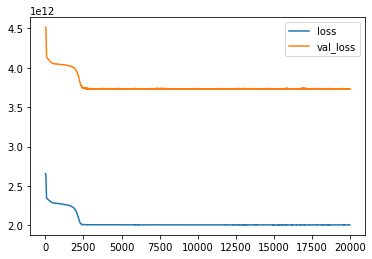

In [25]:
losses.plot()

## model ewaluation

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [27]:
X_test

array([[5.77330705e-01, 6.95901602e-01, 6.58007900e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.10513861e-01, 8.56354107e-01, 2.50571446e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.18636003e-01, 4.30313241e-01, 5.99937123e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.16840399e-01, 7.27003818e-01, 6.58007900e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.26418709e-01, 4.82669152e-01, 1.76201257e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.16204162e-01, 6.70320789e-01, 9.16686819e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [28]:
predictions = model.predict(X_test)

In [29]:
mean_absolute_error(y_test,predictions)

577833.30173693

In [30]:
np.sqrt(mean_squared_error(y_test,predictions))

1932222.8709071542

In [31]:
explained_variance_score(y_test,predictions)

0.09336854813481266

In [32]:
frame['price'].mean()

584114.2509896448

In [33]:
frame['price'].median()

212750.0

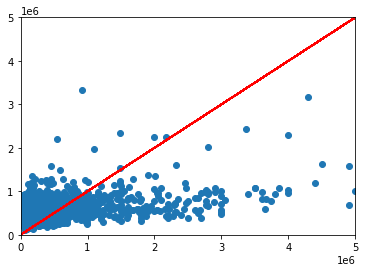

In [34]:
plt.xlim(0,5000000)
plt.ylim(0,5000000)

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [35]:
errors = y_test.reshape(1908, 1) - predictions

<AxesSubplot:ylabel='Count'>

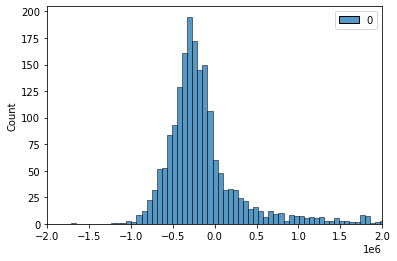

In [36]:
plt.xlim(-2000000,2000000)

sns.histplot(errors)